# Exploratory data analysis for data professionals by Jiboku Oluwatunmise

Data science jobs are some of the fastest-growing, most in-demand in technology. Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

## The Objective 

The objective of this analysis is to explore the various salaries which data professionals are offered by theese parameters:  jobs, location, level and company so as to offer data profressionals more insights on the best options available. This would be conducted through the following: 
- Univariate Analysis
- Work Year Analysis
- Experience Level Analysis
- Company Location Analysis
- Salary Analysis


## Feature Description

- work_year - The year the salary was paid

- experience_level - The experience level in the job during the year with the following possible values:
        EN Entry-level
        Junior MI Mid-level
        Intermediate SE Senior-level
        Expert EX Executive-level
        Director
        
- employment_type - The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

- job_title - The role worked in during the year

- salary - The total gross salary amount paid.

- salary_currency - The currency of the salary paid as an ISO 4217 currency code.

- salary_in_usd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)

- employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code

- remote_ratio - The overall amount of work done remotely, possible values are as follows:
        0 No remote work (less than 20%)
        50 Partially remote
        100 Fully remote (more than 80%)

- company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code

- company_size - The average number of people that worked for the company during the year:
        S less than 50 employees (small)
        M 50 to 250 employees (medium)
        L more than 250 employees (large)

- grouped_salary - The salary grouped by variables S, A, B, C, D, and E depending on the value.

- remote label - Conversion of remote ratio to strings where: 
        0 stands for physical
        50 stands for hybrid
        100 stands for remote
      

## Executive Summary

The

# Data Exploration

In [ ]:
#import the libaries which would be used for conducting the EDA

#data analysis libary
import pandas as pd
import sweetviz as sv
import numpy as np
import datetime

#data visualization libary
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.graph_objs as go
import statsmodels.api as sm


# country conversion libraries
import plotly.express as px
import country_converter as coco
import pycountry_convert as pc

In [3]:
# import the dataset into the notebook

ds = pd.read_csv('ds_salaries.csv', sep=',', header= 0)
ds.head()

,no,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# get the format of the dataframs

type(ds)

pandas.core.frame.DataFrame

In [5]:
# get the length of the dataset

len(ds)

607

In [6]:
# get the shape of the dataset

ds.shape

(607, 12)

In [7]:
# get a summary of the dataset

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   no                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


From the summary above we can deduce that there are 607 rows within the dataset with 4 features being integers and 7 being objects.

In [8]:
#check for NaN values

ds.isnull().any()

no                    False
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

Through the above we can realize that there are no null values within the dataset

In [9]:
# Get the desriptive statistics of the dataset

ds.describe().astype(int)

,no,work_year,salary,salary_in_usd,remote_ratio
count,607,607,607,607,607
mean,303,2021,324000,112297,70
std,175,0,1544357,70957,40
min,0,2020,4000,2859,0
25%,151,2021,70000,62726,50
50%,303,2022,115000,101570,100
75%,454,2022,165000,150000,100
max,606,2022,30400000,600000,100


From the above we can deduce the following about the dataset: 
- The year range is between 2020 - 2022
- The year 2022 had the most active data professionals
- Majority of the jobs were remote jobs
- The salary range for data professionals is between USD 2,859  &  USD 600,000
- The average salary for a data professional is USD 112,297

# Editing the dataset

In [10]:
# remove the unimportant features

ds.pop('no')

0        0
1        1
2        2
3        3
4        4
      ... 
602    602
603    603
604    604
605    605
606    606
Name: no, Length: 607, dtype: int64

In [11]:
# remove the unimportant features

ds.pop('salary')

0       70000
1      260000
2       85000
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary, Length: 607, dtype: int64

In [12]:
# create a function to group salary in usd into classes 

def s_usd(x):

    if x >= 250000: 
        return 'S'
    elif x >= 100000:
        return 'A'
    elif x >= 50000: 
        return 'B'
    elif x >= 10000:
        return 'C'
    elif x >= 5000:
        return 'D'
    else:
        return 'E'
    
ds['grouped_salary'] = ds['salary_in_usd'].apply(s_usd)

In [13]:
# create a function to create labels for the remote ratio 

def rr(x):
    if x == 100: 
        return 'Physical'
    elif x == 50:
        return 'Hybrid'
    else:
        return 'Remote'
    
ds['remote_label'] = ds['remote_ratio'].apply(rr)

In [14]:
# Break down the various job titles into categories of data sci, data analyst, researcher, ML engineer, ML scientist,AI engineer, Data Science Science

ds['job_title'] = ds['job_title'].str.replace('Data Scientist','Data Scientist')
ds['job_title'] = ds['job_title'].str.replace('Data Engineer','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Data Analyst','Data Analyst')
ds['job_title'] = ds['job_title'].str.replace('Machine Learning Engineer','Machine Learning Engineer')
ds['job_title'] = ds['job_title'].str.replace('Research Scientist','Researcher')
ds['job_title'] = ds['job_title'].str.replace('Data Science Manager', 'Data Scientist') 
ds['job_title'] = ds['job_title'].str.replace('Data Architect','Data Architect')
ds['job_title'] = ds['job_title'].str.replace('Big Data Engineer','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Machine Learning Scientist','Machine Learning Scientist')
ds['job_title'] = ds['job_title'].str.replace('Principal Data Scientist','Data Scientist')
ds['job_title'] = ds['job_title'].str.replace('AI Scientist','AI Scientist')
ds['job_title'] = ds['job_title'].str.replace('Data Science Consultant','Data Scientist')
ds['job_title'] = ds['job_title'].str.replace('Director of Data Science','Data Scientist')
ds['job_title'] = ds['job_title'].str.replace('Data Analytics Manager','Data Analyst')
ds['job_title'] = ds['job_title'].str.replace('ML Engineer','Machine Learning Engineer')
ds['job_title'] = ds['job_title'].str.replace('Computer Vision Engineer','AI Engineer')
ds['job_title'] = ds['job_title'].str.replace('BI Data Analyst','Data Analyst')      
ds['job_title'] = ds['job_title'].str.replace('Lead Data Engineer','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Data Engineering Manager','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Business Data Analyst','Data Analyst')
ds['job_title'] = ds['job_title'].str.replace('Head of Data','Data Scientist')
ds['job_title'] = ds['job_title'].str.replace('Applied Data Scientist','Data Scientist')
ds['job_title'] = ds['job_title'].str.replace('Applied Machine Learning Scientist','Machine Learning Scientist')
ds['job_title'] = ds['job_title'].str.replace('Head of Data Science','Data Scientist')
ds['job_title'] = ds['job_title'].str.replace('Analytics Engineer','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Data Analytics Engineer','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Machine Learning Developer', 'Machine Learning Engineer')
ds['job_title'] = ds['job_title'].str.replace('Machine Learning Infrastructure Engineer','Machine Learning Engineer')
ds['job_title'] = ds['job_title'].str.replace('Lead Data Scientist','Data Scientist')
ds['job_title'] = ds['job_title'].str.replace('Computer Vision Software Engineer','AI Engineer')
ds['job_title'] = ds['job_title'].str.replace('Lead Data Analyst','Data Analyst')
ds['job_title'] = ds['job_title'].str.replace('Data Science Engineer','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Principal Data Engineer','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Principal Data Analyst','Data Analyst')
ds['job_title'] = ds['job_title'].str.replace('ETL Developer','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Product Data Analyst','Data Analyst')       
ds['job_title'] = ds['job_title'].str.replace('Director of Data Engineering','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Financial Data Analyst', 'Data Analyst')
ds['job_title'] = ds['job_title'].str.replace('Cloud Data Engineer','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Lead Machine Learning Engineer','Machine Learning Engineer')
ds['job_title'] = ds['job_title'].str.replace('NLP Engineer','Machine Learning Engineer')
ds['job_title'] = ds['job_title'].str.replace('Head of Machine Learning','Machine Learning Scientist')
ds['job_title'] = ds['job_title'].str.replace('3D Computer Vision Researcher', 'Researcher')
ds['job_title'] = ds['job_title'].str.replace('Data Specialist','Data Scientist')
ds['job_title'] = ds['job_title'].str.replace('Staff Data Scientist','Data Scientist')
ds['job_title'] = ds['job_title'].str.replace('Big Data Architect','Data Architect')
ds['job_title'] = ds['job_title'].str.replace('Finance Data Analyst', 'Data Analyst')
ds['job_title'] = ds['job_title'].str.replace('Marketing Data Analyst', 'Data Analyst')
ds['job_title'] = ds['job_title'].str.replace('Machine Learning Manager','Machine Learning Scientist')
ds['job_title'] = ds['job_title'].str.replace('Data Analytics Lead','Data Analyst')
ds['job_title'] = ds['job_title'].str.replace('Data Data Engineer','Data Engineer')
ds['job_title'] = ds['job_title'].str.replace('Data Scientist Science','Data Scientist')

In [15]:
# create a function to convert country code to continent name: 

def country_code_to_continent(country_code):
    return pc.country_alpha2_to_continent_code(country_code)


ds['employee_continent'] = ds['employee_residence'].apply(country_code_to_continent)
ds['company_continent'] = ds['company_location'].apply(country_code_to_continent)

In [16]:
# Create a dictionary which would convert the continent code to name: 

continent_codes = {
    'AF': 'Africa',
    'AN': 'Antarctica',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'OC': 'Oceania',
    'SA': 'South America'
}

ds['employee_continent'] = ds['employee_continent'].map(continent_codes)
ds['company_continent'] = ds['company_continent'].map(continent_codes)

In [17]:
# remove the unimportant features

ds.pop('remote_ratio')

0        0
1        0
2       50
3        0
4       50
      ... 
602    100
603    100
604      0
605    100
606    100
Name: remote_ratio, Length: 607, dtype: int64

In [18]:
# convert abbrevations to full text

ds.employment_type.replace({'FT':'Full-time','CT':'Contract','PT':'Part-time','FL': 'Freelance'},inplace=True)
ds.experience_level.replace({'MI':'Mid', 'SE':'Senior', 'EN':'Entry','EX':'Expert'},inplace=True)
ds.company_size.replace({'L':'Large','S':'Small','M':'Medium'},inplace=True)

In [19]:
def country_code_to_country(country_code):
    return pc.country_alpha2_to_conuntry_name(country_code)

In [20]:
# present the top 5 countries using data professionals the most

ds['company_location'].value_counts(ascending=False).nlargest(5)

US    355
GB     47
CA     30
DE     28
IN     24
Name: company_location, dtype: int64

In [21]:
# present the top 5 countries where data analysts are hired the most

ds['employee_residence'].value_counts(ascending=False).nlargest(5)

US    332
GB     44
IN     30
CA     29
DE     25
Name: employee_residence, dtype: int64

In [22]:
# check the dataset

ds.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,company_location,company_size,grouped_salary,remote_label,employee_continent,company_continent
0,2020,Mid,Full-time,Data Scientist,EUR,79833,DE,DE,Large,B,Remote,Europe,Europe
1,2020,Senior,Full-time,Machine Learning Scientist,USD,260000,JP,JP,Small,S,Remote,Asia,Asia
2,2020,Senior,Full-time,Data Engineer,GBP,109024,GB,GB,Medium,A,Hybrid,Europe,Europe
3,2020,Mid,Full-time,Data Analyst,USD,20000,HN,HN,Small,C,Remote,North America,North America
4,2020,Senior,Full-time,Machine Learning Engineer,USD,150000,US,US,Large,A,Hybrid,North America,North America


# 1. Univariate Analysis

## 1.1 Categorical Columns

 #### 1.1.1 Experience Level

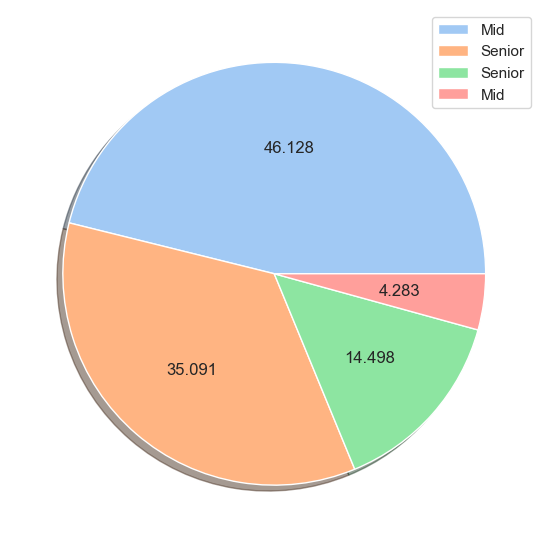

In [226]:
# get the scope of the experience level

ds['experience_level'].value_counts(normalize=True)

plt.figure(figsize=(10,7))
plt.pie(ds['experience_level'].value_counts(normalize=True), autopct='%.3f', shadow=True)
plt.legend(ds['experience_level'])

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

From the above it can be dedeuced that the dataset contains 4 experience levels spread amongst these data professionals. Most professionals in the dataset have the experience level of the intermediate and the least data professionals at the expert level. 

 #### 1.1.2 Job Titles

In [36]:
# get the scope of jobs which data professionals and the count of jobs

ds['job_title'].value_counts()

Data Scientist                191
Data Engineer                 167
Data Analyst                  127
Machine Learning Engineer      55
Researcher                     17
Machine Learning Scientist     14
Data Architect                 12
AI Engineer                     9
AI Scientist                    7
Data Data Engineer              4
Data Scientist Science          4
Name: job_title, dtype: int64

From the above it can deduced that from the dataset, the top 3 data jobs are Data Scientist, Data Engineer & Data Analyst. The above also actualizes that there is a heap variety of jobs and opportunities within the data space which inidiviuals are yet to take advantage of. The big question here is why? That would be considered over the next few lines of code

 #### 1.1.3 Employment Type

In [67]:
# get the type of employment which data professionals are offered

ds['employment_type'].value_counts(normalize=True)

FT    0.968699
PT    0.016474
CT    0.008237
FL    0.006590
Name: employment_type, dtype: float64

From the above it can be concluded that majority of the jobs taken up or offered are full time jobs and the least being freelance jobs. This opposes the current believe that there is an abundance of data roles being offered for freelancers or better yet most freelancers do not get the jobs offered on freelance

In [40]:
# get the amount of counrtries and currencies invloved in the dataset

ds['salary_currency'].value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

From the above there are 17 countries involved in paying salaries, the most paying currency being the united states having more than double of the second most paying country. 

 #### 1.1.4 Employee Residence and Location

In [43]:
# get the various locations of the employees

ds['employee_residence'].value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

The above actualizes that majority of data professionals reside in the US while the rest prefer european countries

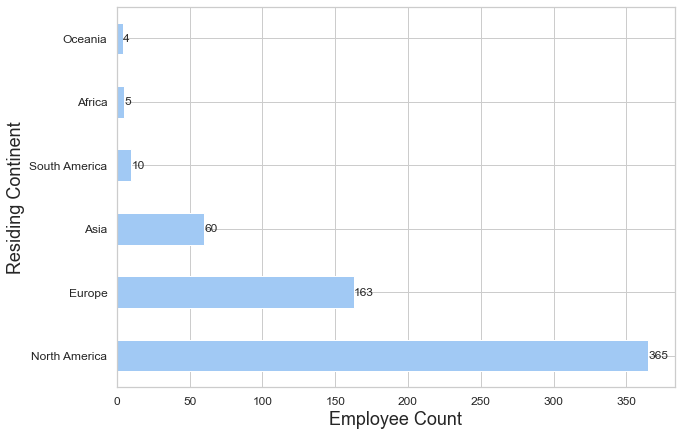

In [26]:
# get the number of employees in various continent and visualize

plt.figure(figsize=(10, 7))

ds['employee_continent'].value_counts().plot.barh()
ax = plt.gca()

plt.xlabel("Employee Count", fontsize=18)
plt.ylabel("Residing Continent", fontsize=18)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

for i in ax.containers:
    ax.bar_label(i,)

sns.set_theme(style="whitegrid", palette="pastel")

From the above the various employees used in the dataset reside in 56 different countries with the united states having the most residencies. Oceania having the least residencies as well

In [154]:
# get the various locations of the companies

ds['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

From the above, the US is the country with the highest company locations requiring data professionals while others had 1 company in a country. This shows that although some companies are advanced to the point where they require a lot of data professionals majority of countries are yet to realize their need. 

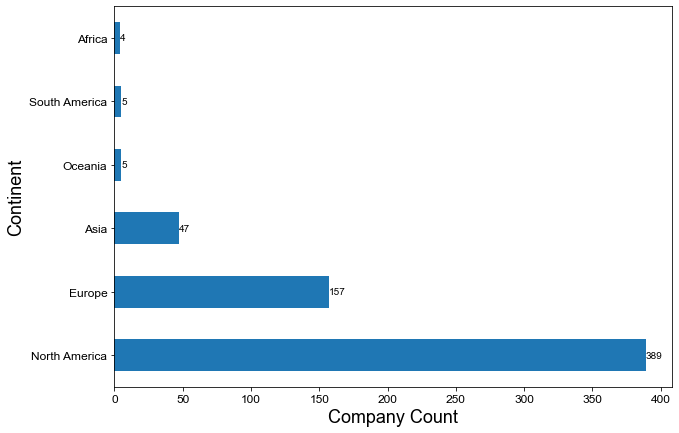

In [25]:
# get the number of companies in various continent and visualize

plt.figure(figsize=(10, 7))

ds['company_continent'].value_counts().plot.barh()
ax = plt.gca()

plt.xlabel("Company Count", fontsize=18)
plt.ylabel("Continent", fontsize=18)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

From the above the various employing companies used in the dataset reside in 50 different countries with North America having the most companies requiring data professionals and Africa having the least. Although Oceania being an anomaly, the graph shows how the more advanced continents require data professionals more. 

 #### 1.1.5 Company Size

In [ ]:
# get the count of the group size of companies and visualize

ds['company_size'].value_counts(normalize=True)

plt.figure(figsize=(10,7))
plt.pie(ds['company_size'].value_counts(normalize=True), autopct='%.3f', shadow=True)
plt.legend(ds['company_size'])

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

From the above, majority of companies are medium sized firm and minority are small sized firms. This simply means that the smaller the company the less chance of hiring a data scientist. furthermore, modern upscaling businesses realize the importance of data scientist more than the larger ones and use them more. 

 #### 1.1.6 Salary Differences

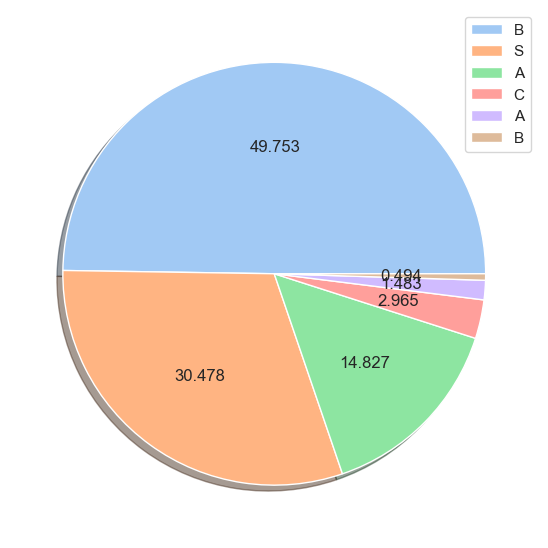

In [222]:
# get the percentage distribution of the grouped salaries and visualize

ds['grouped_salary'].value_counts(normalize = True)

plt.figure(figsize=(10,7))
plt.pie(ds['grouped_salary'].value_counts(normalize=True), autopct='%.3f', shadow=True)
plt.legend(ds['grouped_salary'])

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

From the above we can deduce earnings between 50,000 and 99,999 are the most offered to data professionals.

 #### 1.1.7 Remote Ratio

In [27]:
# get the various means which the data professionals conducted their work 

ds['remote_label'].value_counts(normalize=True)



Physical    0.627677
Remote      0.209226
Hybrid      0.163097
Name: remote_label, dtype: float64

This shows that physical jobs are the most occurent in the data field while hybrid roles are the least offered. 

# Numeric columns

 #### 1.2.1 Work year analysis

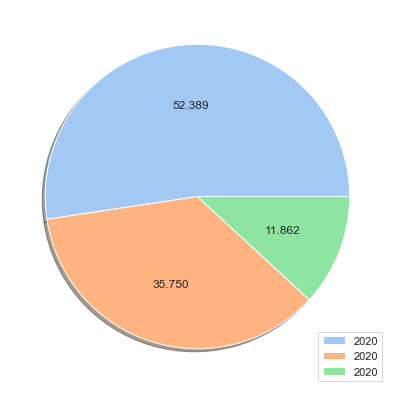

In [28]:
# get the percentage distribution of the year the salaries was paid

ds['work_year'].value_counts(normalize=True)

plt.figure(figsize=(10,7))
plt.pie(ds['work_year'].value_counts(normalize=True), autopct='%.3f', shadow=True)
plt.legend(ds['work_year'])

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

From the above we can realize that majority of salaries were offered in 2020 while the least were offered in 2021

 #### 1.2.1 Salary in USD analysis

In [151]:
# get the various salaries and the count of professionals recieving these salaries

ds['salary_in_usd'].value_counts()

100000    15
120000    12
150000    12
200000    10
135000     9
          ..
74000      1
61896      1
26005      1
22611      1
129000     1
Name: salary_in_usd, Length: 369, dtype: int64

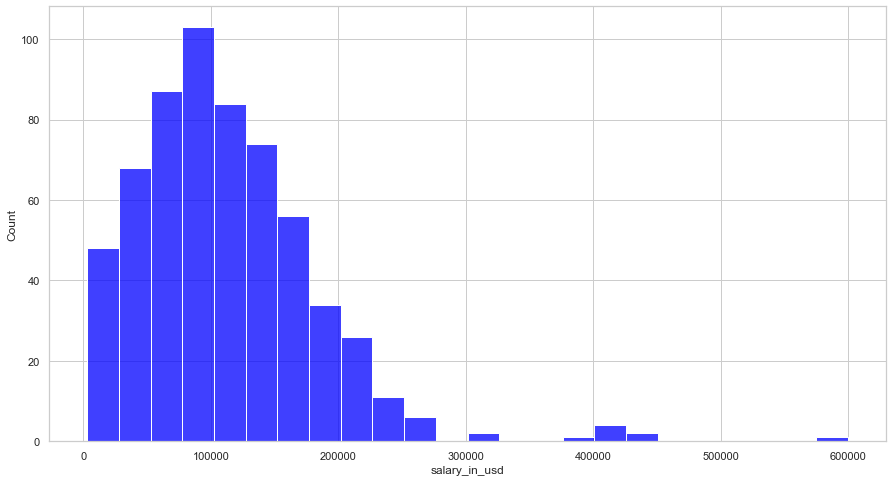

In [142]:
# Visualize the distribution of the salaries in bins

plt.figure(figsize=(15,8))

sns.histplot(data = ds, x='salary_in_usd',bins = 24, color = 'blue')

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

From the above it can be deduced that majority of salaries offered were offered between 100,000 and 150,000

In [181]:
# Get a visualization to see the actual picture.

my_report = sv.analyze(ds)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 2.  Work Year Analysis

    with salary & remote ratio(remote label)

#### 2.1 Remote label & Work year   

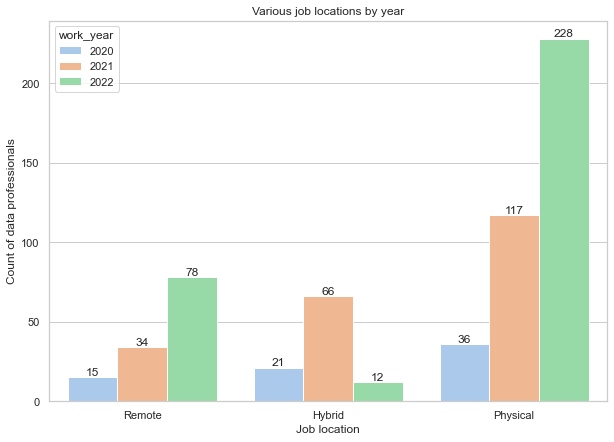

In [54]:
# Establish a visualization to compare the work year and the remote ratios

plt.figure(figsize=(10,7))

ax = sns.countplot(x='remote_label', data=ds, hue='work_year')

plt.title('Various job locations by year')
plt.xlabel('Job location')
plt.ylabel('Count of data professionals')

for i in ax.containers:
    ax.bar_label(i,)

sns.set_theme(style="whitegrid", palette="pastel")

From the above, the following can be deduced: 

    1) we can deduce that not only did data roles expand massively in 2022, the amount of physical jobs rose x2 from 2021. 

    2) Moreover there are far less hybrid jobs in 2022 than the other years. 

    3) While 2020 had the least amount of active roles most likely due to covid it still had a higher number of hybrid roles than 2022. 

    4) Both remote and physical consistently increase in numbers as the years changes but 2021 is an anomaly

#### 2.2 Remote ratio & Work year   

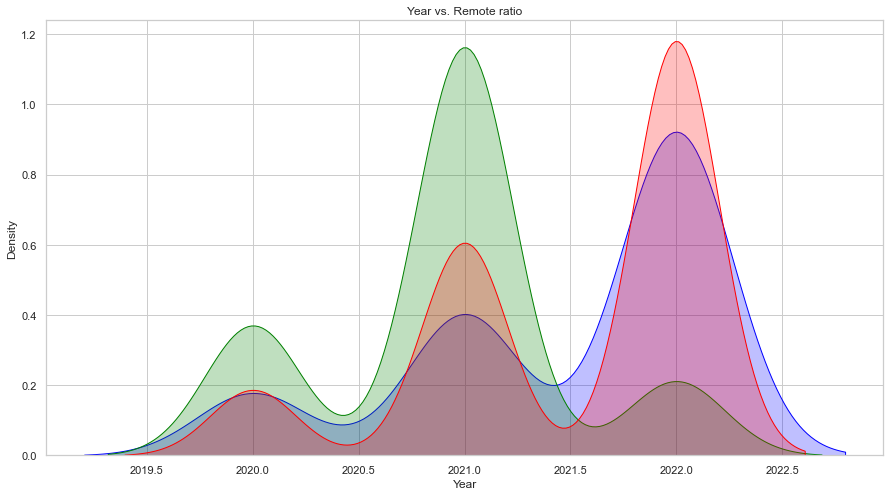

In [141]:
# Reaffirm the gatherings through a density estimate

plt.figure(figsize=(15,8))

sns.kdeplot(ds[ds["remote_label"]=='Remote']["work_year"], shade=True, color="blue", label="Remote")
sns.kdeplot(ds[ds["remote_label"]=='Hybrid']["work_year"], shade=True, color="green", label="Hybrid")
sns.kdeplot(ds[ds["remote_label"]=='Physical']["work_year"], shade=True, color="red", label="Physical")


plt.title('Year vs. Remote ratio')
plt.xlabel('Year')
plt.ylabel('Density')

sns.set_theme(style="whitegrid", palette="pastel")

From the above the following can be deduced:

    1)  Hybrid jobs were the most locations between 2020 and 2021 but was the least in 2022
    
    2)  Remote jobs grew gradually from 2020 till 2022
    
    3)  Physical jobs grew gradually from 2020 til 2022
    
    4)  It was only the hybrid jobs which declined at 2022

#### 2.3   Work year & Salary In USD 

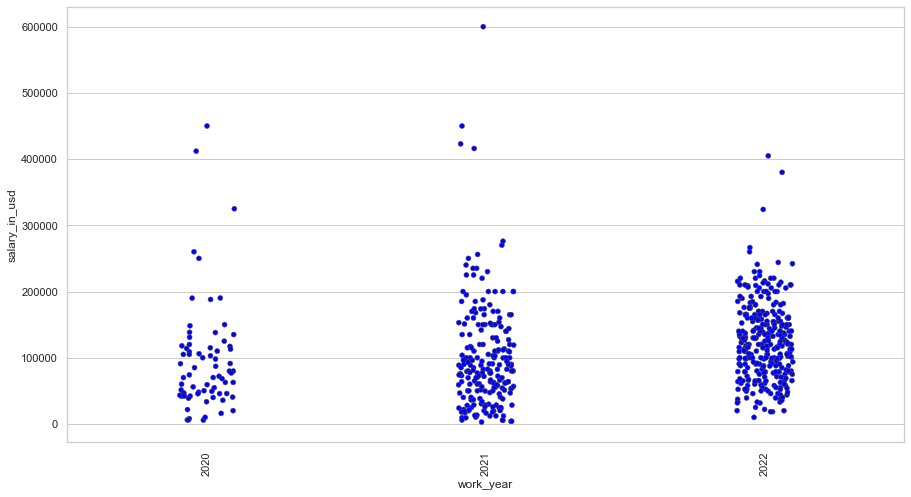

In [140]:
# get a visualization which shows the extent of salary offers per year

plt.figure(figsize=(15,8))

sns.stripplot(x='work_year', y='salary_in_usd', data=ds, linewidth=.5, color='blue')
plt.xticks(rotation=90)

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

From the above we can notice the following: 

    1) The extent of salary offerings increased each year
    2) The high paying jobs reduces as the number of professionals increases
    3) The overall salary is being shared amongst the data professionals
    4) It is possible because of the boom in data profession, the more the individuals the less the extent of pay. 

# 3. Experience Level Analysis

    with Employment Type, Top 3 Job Title, Company Size

#### 3.1 Experience Level & Type of employment

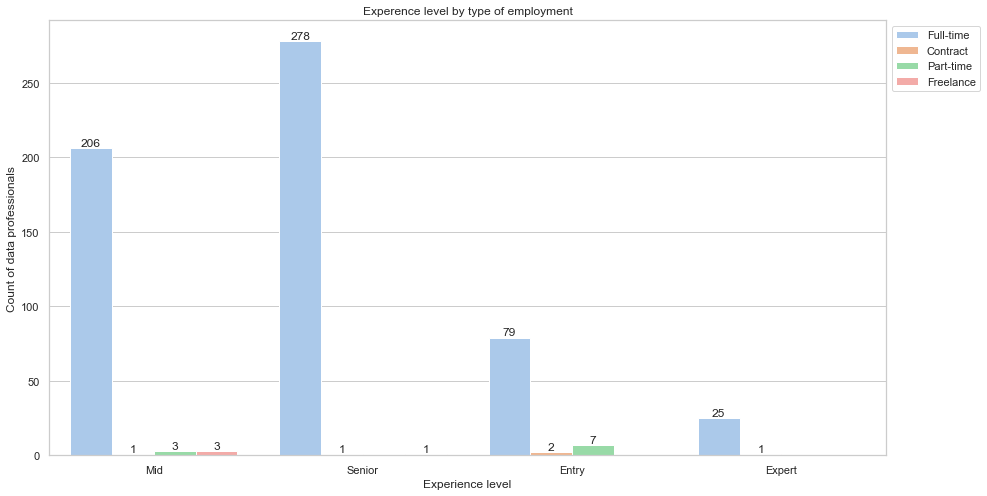

In [139]:
# Establish a visualization to compare the experience level with employment type

plt.figure(figsize=(15,8))

ax = sns.countplot(x='experience_level', data=ds, hue='employment_type')

plt.title('Experence level by type of employment')
plt.xlabel('Experience level')
plt.ylabel('Count of data professionals')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)

sns.set_theme(style="whitegrid", palette="pastel")

From the above we can deduce that majority of jobs in the data sector are full time roles offering little to no options in another role or dataset

#### 3.2 Experience Level & Company Size

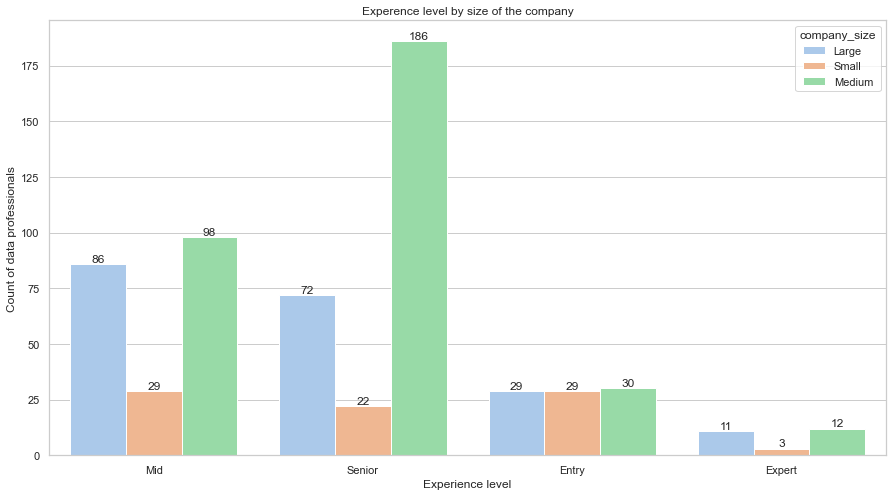

In [138]:
# Establish a visualization to compare the experience level with employment type

plt.figure(figsize=(15,8))

ax = sns.countplot(x='experience_level', data=ds, hue='company_size')

plt.title('Experence level by size of the company')
plt.xlabel('Experience level')
plt.ylabel('Count of data professionals')

for i in ax.containers:
    ax.bar_label(i,)

sns.set_theme(style="whitegrid", palette="pastel")

From the above, we can deduce the above:
    
    1) The in-demand experience level is a senior position
    2) The entry level role is required the same extent it is across all other sizes
    3) Medium companies demand most hires for data professionals especially those in the africa

#### 3.1 Experience Level & Top 3 data professionals

In [33]:
#Get the top 3 job title

top_3_job_titles = ds['job_title'].value_counts().nlargest(3).index

# Filter the DataFrame based on the top 3 job titles

top3_title = ds.loc[ds['job_title'].isin(top_3_job_titles)]
top3_title.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,company_location,company_size,grouped_salary,remote_label,employee_continent,company_continent
0,2020,Mid,Full-time,Data Scientist,EUR,79833,DE,DE,Large,B,Remote,Europe,Europe
2,2020,Senior,Full-time,Data Engineer,GBP,109024,GB,GB,Medium,A,Hybrid,Europe,Europe
3,2020,Mid,Full-time,Data Analyst,USD,20000,HN,HN,Small,C,Remote,North America,North America
5,2020,Entry,Full-time,Data Analyst,USD,72000,US,US,Large,B,Physical,North America,North America
6,2020,Senior,Full-time,Data Scientist,USD,190000,US,US,Small,A,Physical,North America,North America


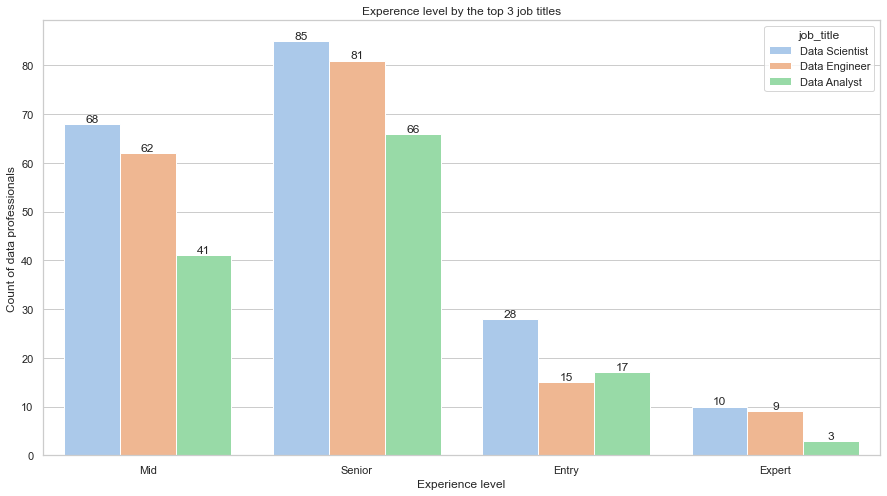

In [137]:
# Establish a visualization to compare the experience level with employment type

plt.figure(figsize=(15,8))

ax = sns.countplot(x='experience_level', data=top3_title, hue='job_title')

plt.title('Experence level by the top 3 job titles')
plt.xlabel('Experience level')
plt.ylabel('Count of data professionals')

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

From the above we can deduce from the top 3 data roles that majority of professionals with these roles are at a senior level especially data scientists and the minority are at the expert level. A vast amount of individuals are also in the mid range wwhich has numbers close to those in a senior level. 

# 4. Company Location Analysis
           with experience level

#### 4.1 Company Continent & experience Level

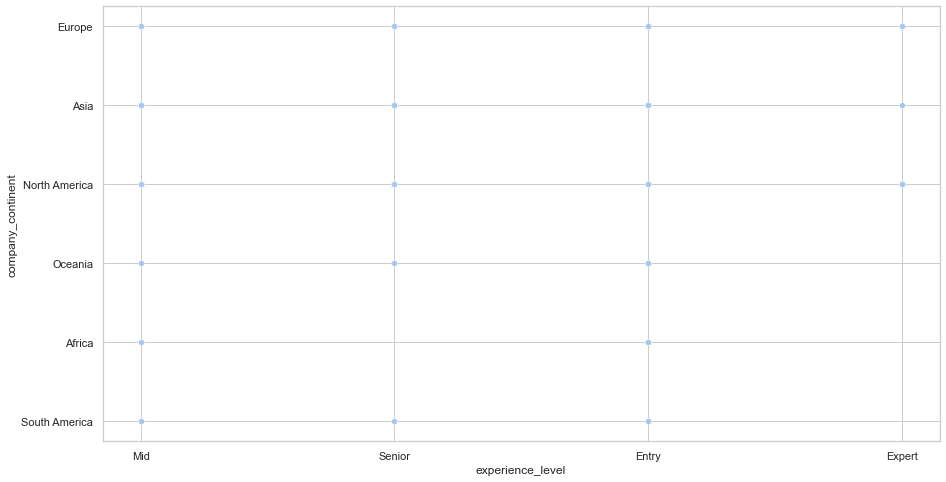

In [136]:
# Create a visualization showing the relationships of the company location and experience level

plt.figure(figsize=(15,8))

sns.scatterplot(x=ds['experience_level'], y= ds['company_continent'])

plt.show()

From the above, the following can be deduced: 
    
        1) Europe, Asia and North America have all the experience levelled data scientists
        2) Oceania and South America lack expert data scientists in the entire continent
        3) While Africa lacks both senior and expert data scientists in the continent. 

#### 4.2 Company Continent & experience Level

In [ ]:
# Filtering out the company continent to get a better overview 

company_crosstab = pd.crosstab(index=ds['experience_level'],columns=ds['company_continent'])

print(crosstab)

<Figure size 1080x576 with 0 Axes>

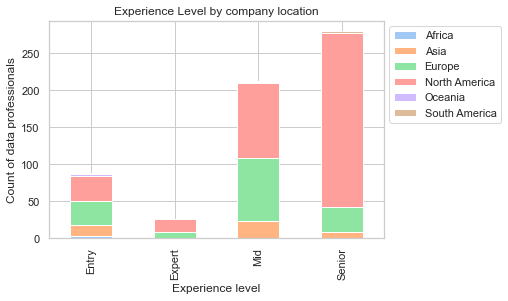

In [135]:
# Visualize plotted graphs

plt.figure(figsize=(15,8))

ax = company_crosstab.plot(kind='bar', stacked=True)

plt.title('Experience Level by company location')
plt.xlabel('Experience level')
plt.ylabel('Count of data professionals')
plt.legend(bbox_to_anchor=(1, 1))


sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

The following can be deduced from the codes above: 

        1) Majority of data professionals in all experience levels reside in North America
        2) The data professionals in a mid level are populous in Europe and North American continents
        3) In Asia, Majority of data professionals are at a mid level

#### 4.4 North America & experience Level

In [70]:
# Create a data frame for north american countries

North_America = ds.loc[ds['company_continent'] == 'North America']

North_America.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,company_location,company_size,grouped_salary,remote_label,employee_continent,company_continent
3,2020,Mid,Full-time,Data Analyst,USD,20000,HN,HN,Small,C,Remote,North America,North America
4,2020,Senior,Full-time,Machine Learning Engineer,USD,150000,US,US,Large,A,Hybrid,North America,North America
5,2020,Entry,Full-time,Data Analyst,USD,72000,US,US,Large,B,Physical,North America,North America
6,2020,Senior,Full-time,Data Scientist,USD,190000,US,US,Small,A,Physical,North America,North America
8,2020,Mid,Full-time,Data Analyst,USD,135000,US,US,Large,A,Physical,North America,North America


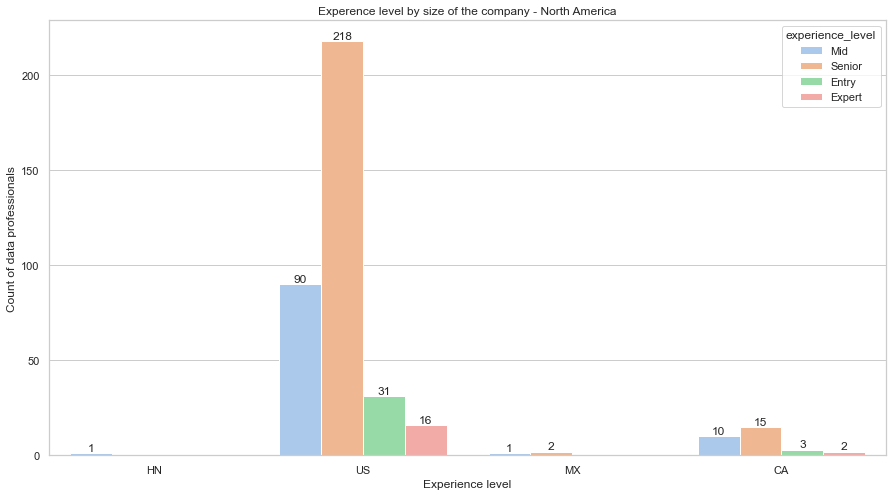

In [134]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x='company_location', data=North_America, hue='experience_level')

plt.title('Experence level by size of the company - North America')
plt.xlabel('Experience level')
plt.ylabel('Count of data professionals')

for i in ax.containers:
    ax.bar_label(i,)

sns.set_theme(style="whitegrid", palette="pastel")

The above analyzes the job professionals in North America, we can deduce the following: 

        1) Only the US has data professionals in all levels 
        2) Mexico and HN have a total 3 data professionals 
        3) Canada and Us have data professionals in mainly senior roles
        4) The senior and mid data professionals are more in the data market within North America. 

#### 4.5 Europe & experience Level

In [73]:
# Create a data frame for Eurpeann countries

Europe = ds.loc[ds['company_continent'] == 'Europe']

Europe.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,company_location,company_size,grouped_salary,remote_label,employee_continent,company_continent
0,2020,Mid,Full-time,Data Scientist,EUR,79833,DE,DE,Large,B,Remote,Europe,Europe
2,2020,Senior,Full-time,Data Engineer,GBP,109024,GB,GB,Medium,A,Hybrid,Europe,Europe
7,2020,Mid,Full-time,Data Scientist,HUF,35735,HU,HU,Large,C,Hybrid,Europe,Europe
10,2020,Entry,Full-time,Data Scientist,EUR,51321,FR,FR,Small,B,Remote,Europe,Europe
12,2020,Entry,Full-time,Data Scientist,EUR,39916,FR,FR,Medium,C,Remote,Europe,Europe


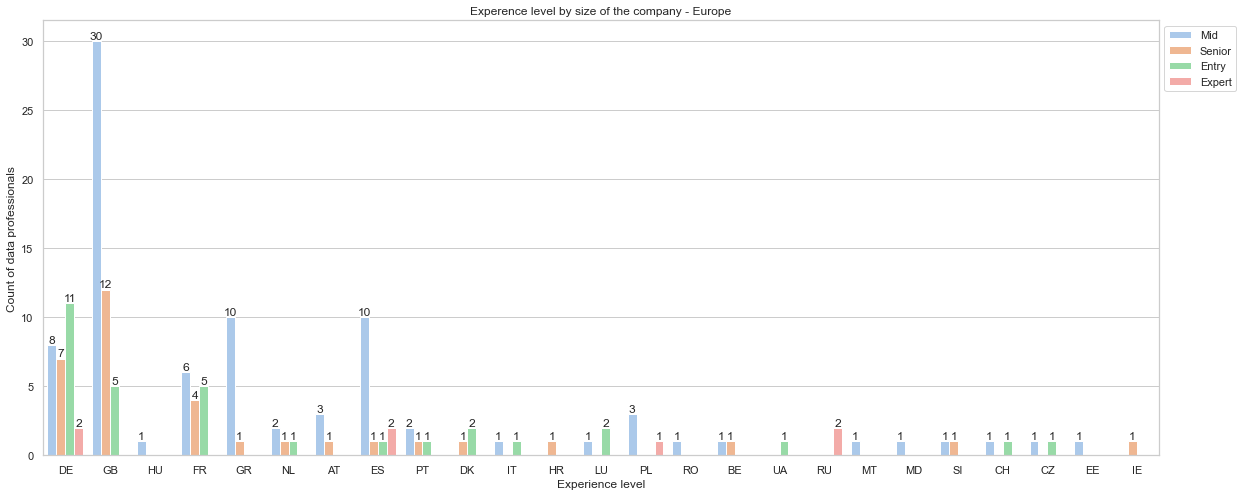

In [132]:
plt.figure(figsize=(20,8))
 
ax = sns.countplot(x='company_location', data= Europe, hue='experience_level')

plt.title('Experence level by size of the company - Europe')
plt.xlabel('Experience level')
plt.ylabel('Count of data professionals')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)

sns.set_theme(style="whitegrid", palette="pastel")

The following analyzes data professionals residing in Europe, the following can be deduced: 

        1) Majority counntries in Europe have less than 5 data professionals in total.
        2) Countries like DE, GB, FR, GR and ES have more than 10 data professionals.
        3) GB requires more data professionals than other countries 
        4) Majority of data professionals in Europe are at a mid level
        5) DE has a country anomaly where majority of its data professsionals are at an entry level. 

####  4.6   Asia & experience Level

In [79]:
# Create a data frame for Asian countries

Asia = ds.loc[ds['company_continent'] == 'Asia']

Asia.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,company_location,company_size,grouped_salary,remote_label,employee_continent,company_continent
1,2020,Senior,Full-time,Machine Learning Scientist,USD,260000,JP,JP,Small,S,Remote,Asia,Asia
11,2020,Mid,Full-time,Data Scientist,INR,40481,IN,IN,Large,C,Remote,Asia,Asia
15,2020,Mid,Full-time,Data Analyst,USD,8000,PK,PK,Large,D,Hybrid,Asia,Asia
16,2020,Entry,Full-time,Data Engineer,JPY,41689,JP,JP,Small,C,Physical,Asia,Asia
18,2020,Entry,Full-time,Data Scientist,INR,5707,IN,IN,Medium,D,Hybrid,Asia,Asia


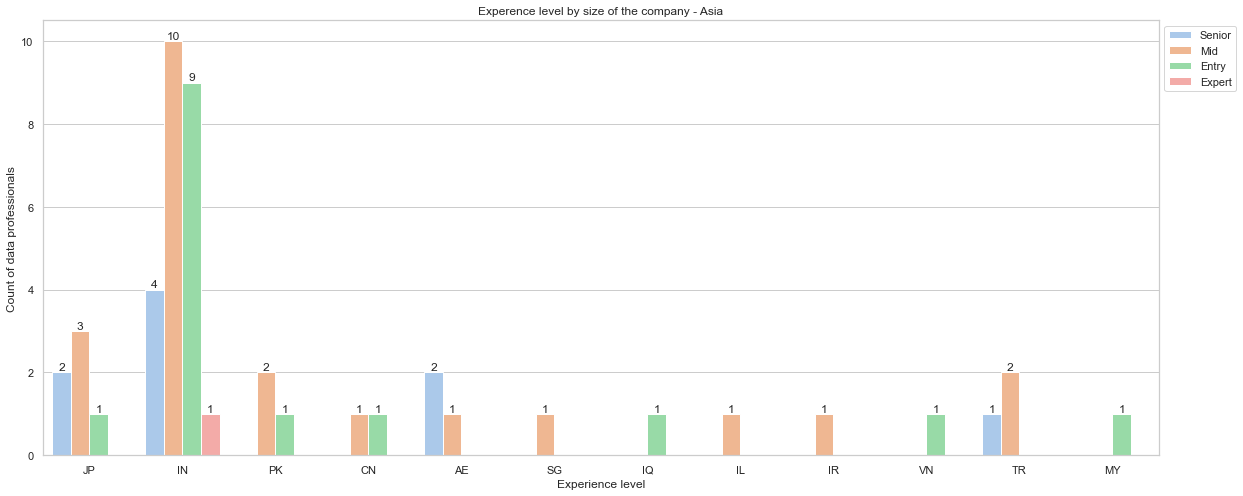

In [131]:
plt.figure(figsize=(20,8))
 
ax = sns.countplot(x='company_location', data= Asia, hue='experience_level')

plt.title('Experence level by size of the company - Asia')
plt.xlabel('Experience level')
plt.ylabel('Count of data professionals')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)

sns.set_theme(style="whitegrid", palette="pastel")

The following analyzes data professionals residing in Asia, the following can be deduced: 

        1) Majority countries in Asia have less than 5 data professionals in total.
        2) The only country with more than 5 data professionals is IN where majority of its professionals are at a mid level

# 5. Salary Analysis
           with Work Year, Experience Level, Company Size, Job Title & Remote Ratio

#### 5.1 salary & work year

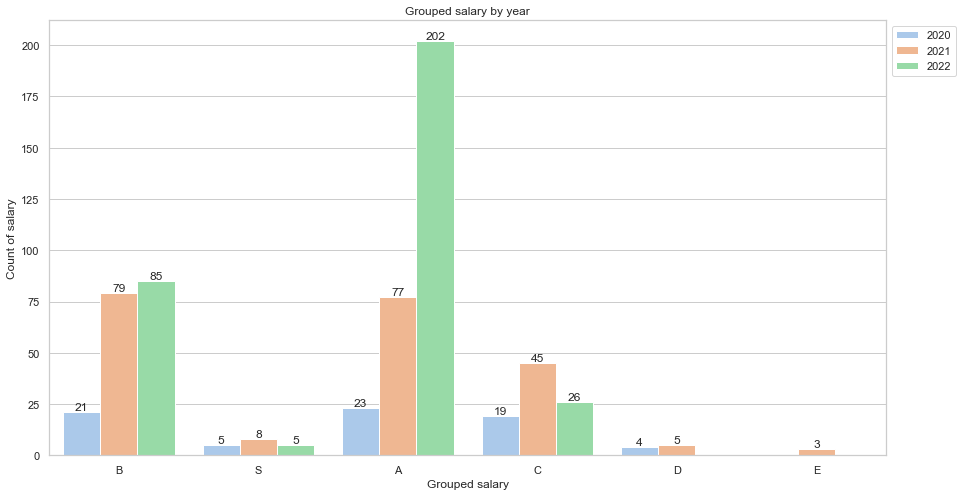

In [130]:
# compare the work year with the salary groups

plt.figure(figsize=(15,8))

ax = sns.countplot(x='grouped_salary', data=ds, hue='work_year')

plt.title('Grouped salary by year')
plt.xlabel('Grouped salary')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

The  following can be deduced: 

        1) Majority of salaries offered to data professionals were between 100,000 - 249,999 USD. 
        2) 2022 had more salaries paid out to data professionals. 
        3) The salaries offered to data professionals gradually increased as the year increased. 

In [148]:
# show the various salary currency by year

wk_yrs_crosstab = pd.crosstab(index=ds['salary_currency'],columns=ds['work_year'])

print(wk_yrs_crosstab)

work_year        2020  2021  2022
salary_currency                  
AUD                 0     0     2
BRL                 0     2     0
CAD                 1    10     7
CHF                 0     0     1
CLP                 0     1     0
CNY                 1     0     1
DKK                 1     1     0
EUR                23    44    28
GBP                 3    12    29
HUF                 1     1     0
INR                 4    19     4
JPY                 1     2     0
MXN                 1     1     0
PLN                 0     2     1
SGD                 0     2     0
TRY                 0     3     0
USD                36   117   245


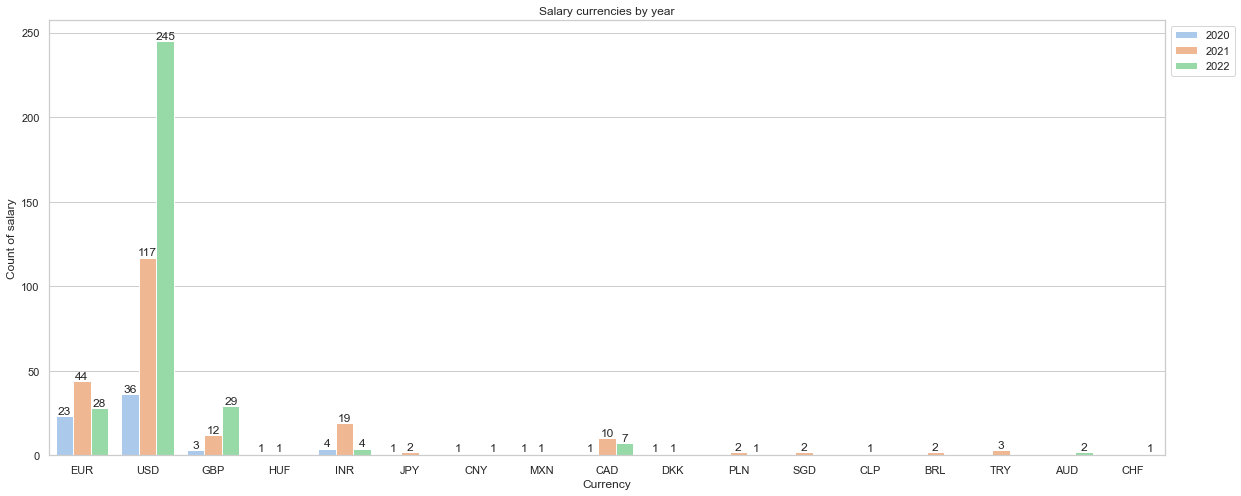

In [129]:
#compare the work year with the salary currencies 

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=ds, hue='work_year')

plt.title('Salary currencies by year')
plt.xlabel('Currency')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

From the above the following can be deduced: 

        1) Although there are a lot of curriencies which are being offered to data professionals. 
        2) The USD pays out to data professionals more than any other currency 
        3) Unlike USD, EUR was paid to data professionals more in 2021 than 2022.

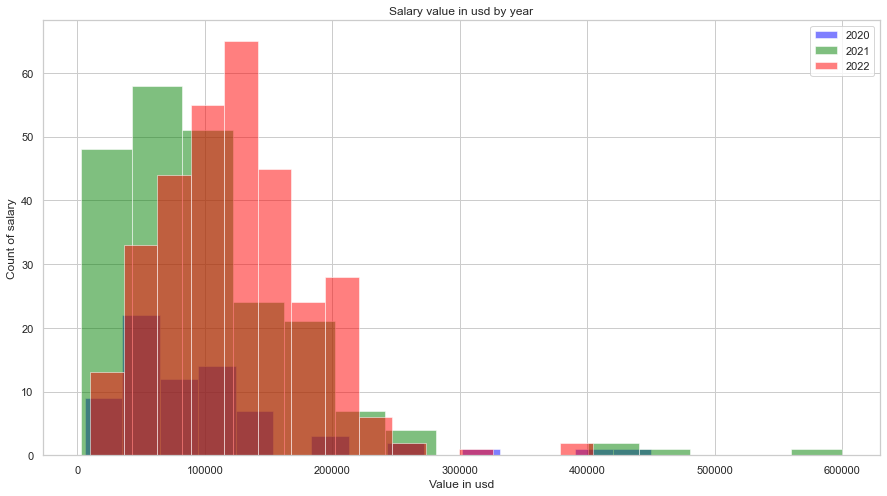

In [128]:
#compare the work year with the salary currencies 

plt.figure(figsize=(15,8))

a_ds = ds[ds['work_year'] == 2020]
b_ds = ds[ds['work_year'] == 2021]
c_ds = ds[ds['work_year'] == 2022]

plt.hist(a_ds['salary_in_usd'], bins=15, alpha=0.5, color='blue', label='2020')
plt.hist(b_ds['salary_in_usd'], bins=15, alpha=0.5, color='green', label='2021')
plt.hist(c_ds['salary_in_usd'], bins=15, alpha=0.5, color='red', label='2022')

plt.title('Salary value in usd by year')
plt.xlabel('Value in usd')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

From the above it can be deduced that 2022 had more payments to data professionals than any other year in the dataset. The highest paid data proessional was paid in 2021. The amount of data professionals being paid increased in 2022 but in 2021 larger amounts were paid to data professionals. 

In [208]:
# comparing all three salary columns to generate further insights 

wk_yr_pivot = pd.pivot_table(ds, values='salary_in_usd', index=['work_year'], columns=['salary_currency', 'grouped_salary'], aggfunc='count')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

wk_yr_pivot.fillna(0)

salary_currency  AUD  BRL  CAD       CHF  CLP  CNY  DKK  EUR              GBP  \
grouped_salary     B    C    A    B    A    C    C    C    A     B     C    A   
work_year                                                                       
2020             0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  2.0  12.0   9.0  2.0   
2021             0.0  2.0  3.0  7.0  0.0  1.0  0.0  1.0  5.0  26.0  13.0  4.0   
2022             2.0  0.0  2.0  5.0  1.0  0.0  1.0  0.0  1.0  18.0   9.0  6.0   

salary_currency             HUF  INR             JPY       MXN       PLN  SGD  \
grouped_salary      B    C    C    B     C    D    B    C    C    E    C    A   
work_year                                                                       
2020              1.0  0.0  1.0  0.0   1.0  3.0  0.0  1.0  1.0  0.0  0.0  0.0   
2021              8.0  0.0  1.0  3.0  12.0  4.0  2.0  0.0  0.0  1.0  2.0  1.0   
2022             17.0  6.0  0.0  1.0   3.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

salary_currency       TRY    USD                             
grouped_salary     B    C      A     B     C    D    E    S  
work_year                                                    
2020             0.0  0.0   18.0   8.0   4.0  1.0  0.0  5.0  
2021             1.0  3.0   64.0  32.0  10.0  1.0  2.0  8.0  
2022             0.0  0.0  192.0  42.0   6.0  0.0  0.0  5.0

#### 5.2  Salary & Experience Level

In [231]:
# Show an overview of the comparism between experience level and salary

experience_pivot = ds.pivot_table(index=['experience_level', 'grouped_salary', 'salary_currency'], values = 'salary_in_usd', aggfunc = 'count')



print(experience_pivot)

                                                 salary_in_usd
experience_level grouped_salary salary_currency               
Entry            A              GBP                          1
                                USD                         15
                 B              AUD                          1
                                CAD                          1
                                EUR                         10
                                GBP                          2
                                USD                         20
                 C              DKK                          2
                                EUR                         10
                                GBP                          2
                                INR                          7
                                JPY                          1
                                USD                         10
                 D              INR                    

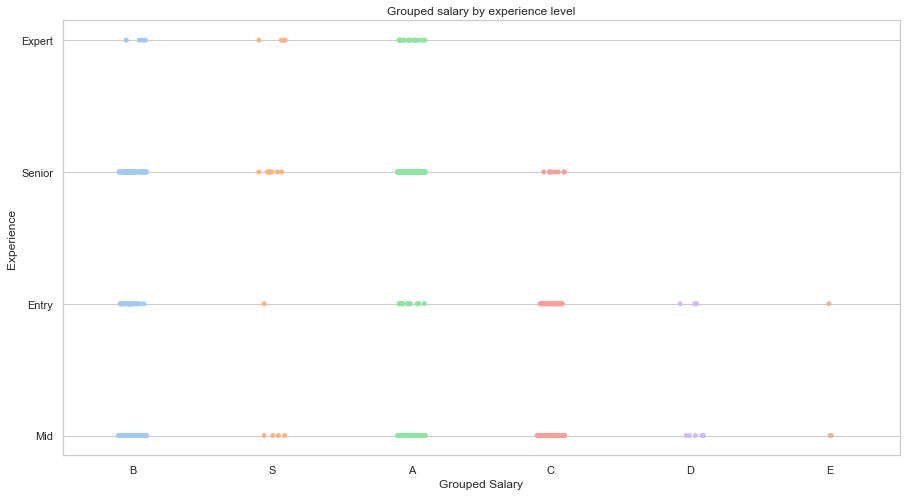

In [174]:
# compare the experience level with the grouped salary

plt.figure(figsize=(15,8))

sns.stripplot(data=ds, x="grouped_salary", y="experience_level")


plt.title('Grouped salary by experience level')
plt.xlabel('Grouped Salary')
plt.ylabel('Experience')

plt.show()

From the above, the following can be deduced: 

    1) Majority of data professionals at a Mid and entry level are paid a 'C' based salary, and least paid an 'E' based 
    2) Majority of data professionals in a Senior level are paid an 'A' based salary and least a 'S' based salary. moreover, they are not offered a 'D' and an 'E' based salary. 
    3) Majority of data professionals at an Expert level are paid an 'A' based salary and least paid a 'B' based salary. moreover, they are not offered a 'C', 'D', or 'E' based salary. 

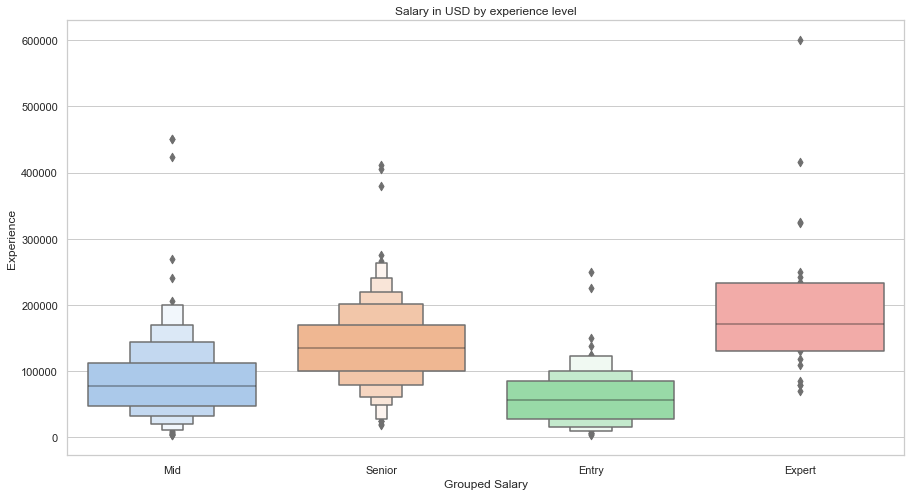

In [177]:
# Visualize a graph which shows the salary offered and the experience level

plt.figure(figsize=(15,8))

sns.boxenplot(x='experience_level', y='salary_in_usd', data=ds)

plt.title('Salary in USD by experience level')
plt.xlabel('Grouped Salary')
plt.ylabel('Experience')

plt.show()

From the above these are the following analysis: 

    1) The highest mean salary is the experts with about 150,000 USD while the least is the entry level around 60,000 USD
    2) The experts are paid all sorts of s

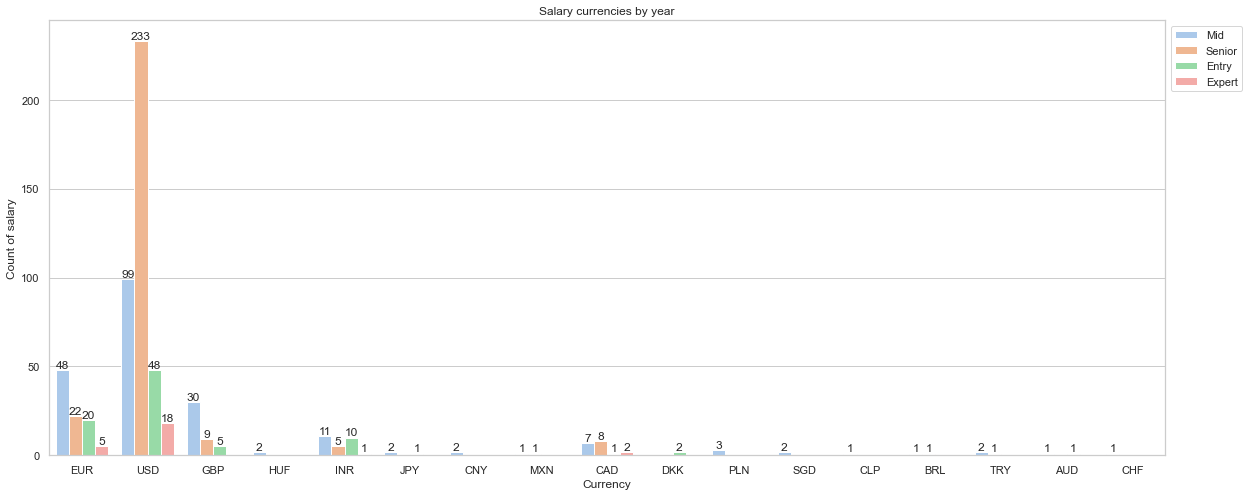

In [181]:
#compare the work year with the salary currencies 

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=ds, hue='experience_level')

plt.title('Salary currencies by year')
plt.xlabel('Currency')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

In [214]:
#Get the top 5 currencies offered as salary so as to remove countries with little variables

currency_in_salary = ds['salary_currency'].value_counts().nlargest(5).index

# Filter the DataFrame based on the top 5 currencies offered as salary

curr_salary = ds.loc[ds['salary_currency'].isin(currency_in_salary)]
curr_salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,company_location,company_size,grouped_salary,remote_label,employee_continent,company_continent
0,2020,Mid,Full-time,Data Scientist,EUR,79833,DE,DE,Large,B,Remote,Europe,Europe
1,2020,Senior,Full-time,Machine Learning Scientist,USD,260000,JP,JP,Small,S,Remote,Asia,Asia
2,2020,Senior,Full-time,Data Engineer,GBP,109024,GB,GB,Medium,A,Hybrid,Europe,Europe
3,2020,Mid,Full-time,Data Analyst,USD,20000,HN,HN,Small,C,Remote,North America,North America
4,2020,Senior,Full-time,Machine Learning Engineer,USD,150000,US,US,Large,A,Hybrid,North America,North America


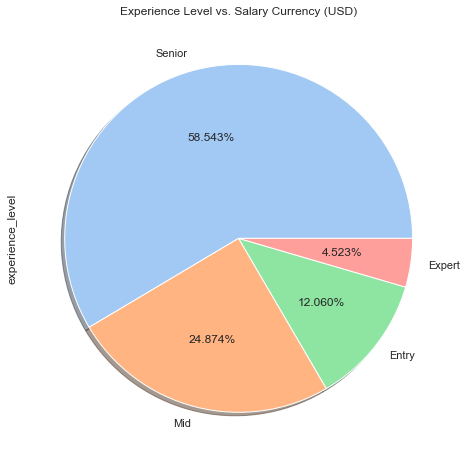

In [226]:
# Filter the dataframe by salary_currency being equal to "USD"
df_filtered = ds[ds['salary_currency'] == "USD"]

# Get the count of each unique value in the experience_level column
counts = df_filtered['experience_level'].value_counts()

# Plot the comparison using a pie chart
plt.figure(figsize=(20,8))

counts.plot.pie(autopct='%.3f%%', shadow=True)
plt.title('Experience Level vs. Salary Currency (USD)')

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

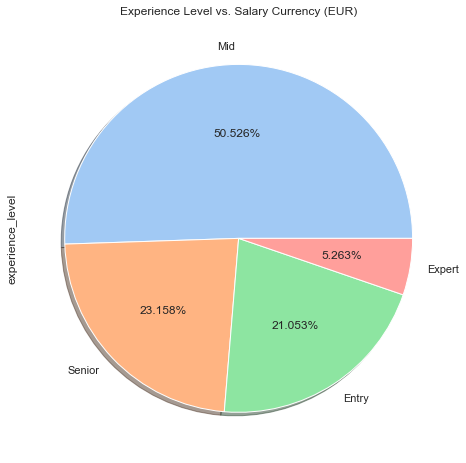

In [227]:
# Filter the dataframe by salary_currency being equal to "EUR"
df_filtered = ds[ds['salary_currency'] == "EUR"]

# Get the count of each unique value in the experience_level column
counts = df_filtered['experience_level'].value_counts()

# Plot the comparison using a pie chart
plt.figure(figsize=(20,8))


counts.plot.pie(autopct='%.3f%%', shadow=True)
plt.title('Experience Level vs. Salary Currency (EUR)')

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

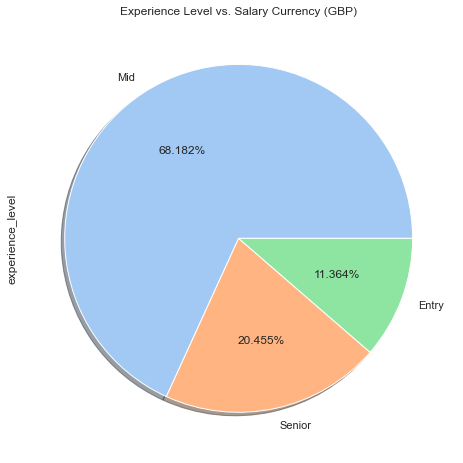

In [228]:
# Filter the dataframe by salary_currency being equal to "GBP"
df_filtered = ds[ds['salary_currency'] == "GBP"]

# Get the count of each unique value in the experience_level column
counts = df_filtered['experience_level'].value_counts()

# Plot the comparison using a pie chart
plt.figure(figsize=(20,8))


counts.plot.pie(autopct='%.3f%%', shadow=True)
plt.title('Experience Level vs. Salary Currency (GBP)')

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

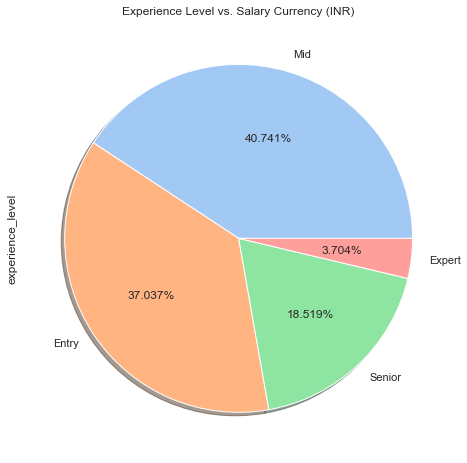

In [229]:
# Filter the dataframe by salary_currency being equal to "INR"
df_filtered = ds[ds['salary_currency'] == "INR"]

# Get the count of each unique value in the experience_level column
counts = df_filtered['experience_level'].value_counts()

# Plot the comparison using a pie chart
plt.figure(figsize=(20,8))


counts.plot.pie(autopct='%.3f%%', shadow=True)
plt.title('Experience Level vs. Salary Currency (INR)')

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

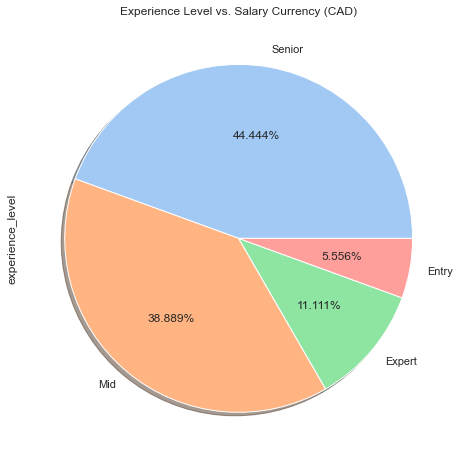

In [230]:
# Filter the dataframe by salary_currency being equal to "CAD"
df_filtered = ds[ds['salary_currency'] == "CAD"]

# Get the count of each unique value in the experience_level column
counts = df_filtered['experience_level'].value_counts()

# Plot the comparison using a pie chart
plt.figure(figsize=(20,8))


counts.plot.pie(autopct='%.3f%%', shadow=True)
plt.title('Experience Level vs. Salary Currency (CAD)')

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

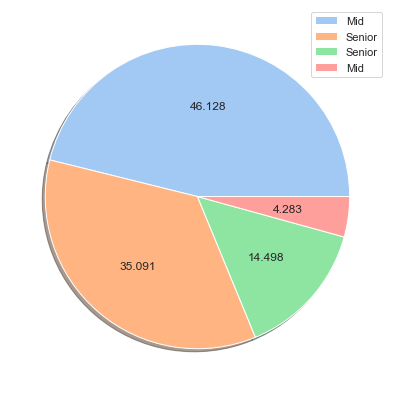

In [213]:
# get the percentage distribution of the year the salaries was paid

curr_salary['salary_currency'].value_counts(normalize=True)

plt.figure(figsize=(10,7))
plt.pie(ds['experience_level'].value_counts(normalize=True), autopct='%.3f', shadow=True)
plt.legend(ds['experience_level'])

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

In [219]:


salary_exp_pivot_avg = pd.pivot_table(ds, values='salary_in_usd', index=['experience_level'], columns=['salary_currency'], aggfunc='mean')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

salary_exp_pivot_avg.round(0)
salary_exp_pivot_avg.fillna(0)


salary_currency,AUD,BRL,CAD,CHF,CLP,CNY,DKK,EUR,GBP,HUF,INR,JPY,MXN,PLN,SGD,TRY,USD
experience_level,,,,,,,,,,,,,,,,,
Entry,86703.0,0.0,52396.000000,0.0,0.0,0.0,37252.5,46484.050000,65604.6,0.0,18059.900000,41689.0,0.0,0.000000,0.0,0.0,77729.500000
Expert,0.0,0.0,157583.000000,0.0,0.0,0.0,0.0,115022.600000,0.0,0.0,79039.000000,0.0,0.0,0.000000,0.0,0.0,234159.722222
Mid,87425.0,12901.0,85757.571429,122346.0,40038.0,40283.5,0.0,58206.687500,80506.9,35997.0,19099.636364,70537.5,2859.0,36887.666667,104176.5,20059.5,119245.383838
Senior,0.0,18907.0,97768.375000,0.0,0.0,0.0,0.0,88530.681818,94477.0,0.0,55987.200000,0.0,33511.0,0.000000,0.0,20171.0,149700.437768


#### Salary & Company Size

In [232]:
# Show an overview of the comparism between experience level and salary

company_pivot = ds.pivot_table(index=['company_size', 'grouped_salary', 'salary_currency'], values = 'salary_in_usd', aggfunc = 'count')



print(company_pivot)

                                             salary_in_usd
company_size grouped_salary salary_currency               
Large        A              CAD                          5
                            CHF                          1
                            EUR                          3
                            GBP                          3
                            USD                         79
             B              AUD                          1
                            CAD                          5
                            EUR                         25
                            GBP                          7
                            INR                          4
                            SGD                          1
                            USD                         19
             C              CLP                          1
                            CNY                          1
                            EUR                         

Text(0, 0.5, 'Experience')

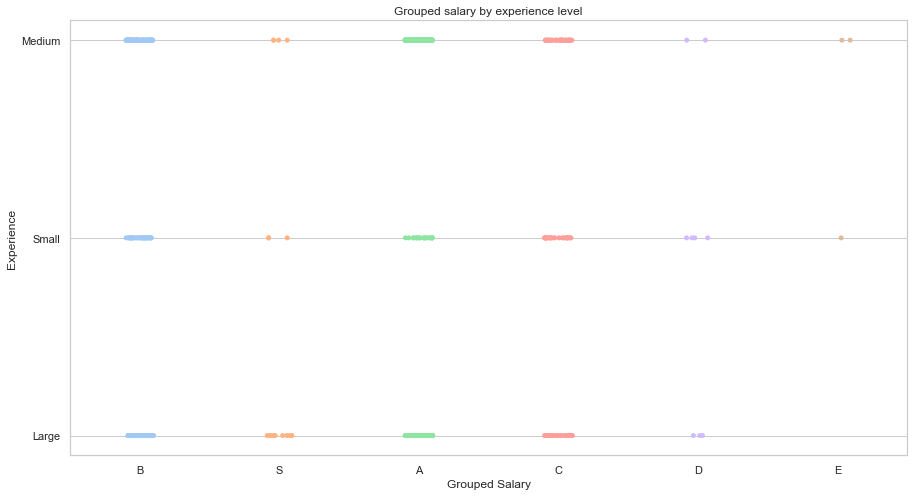

In [233]:

plt.figure(figsize=(15,8))

sns.stripplot(data=ds, x="grouped_salary", y="company_size")


plt.title('Grouped salary by experience level')
plt.xlabel('Grouped Salary')
plt.ylabel('Experience')

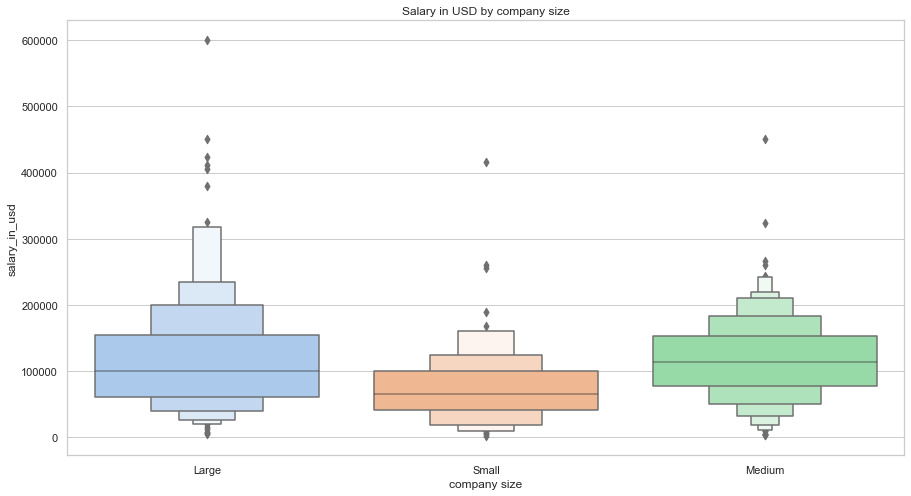

In [236]:
# Visualize a graph which shows the salary offered and the company size

plt.figure(figsize=(15,8))

sns.boxenplot(x='company_size', y='salary_in_usd', data=ds)

plt.title('Salary in USD by company size')
plt.xlabel('company size')
plt.ylabel('salary_in_usd')

plt.show()

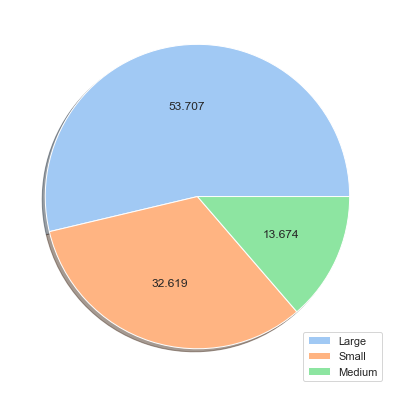

In [246]:
# get the percentage distribution of the year the salaries was paid

ds['salary_in_usd'].value_counts(normalize=True)

plt.figure(figsize=(10,7))
plt.pie(ds['company_size'].value_counts(normalize=True), autopct='%.3f', shadow=True)
plt.legend(ds['company_size'])

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

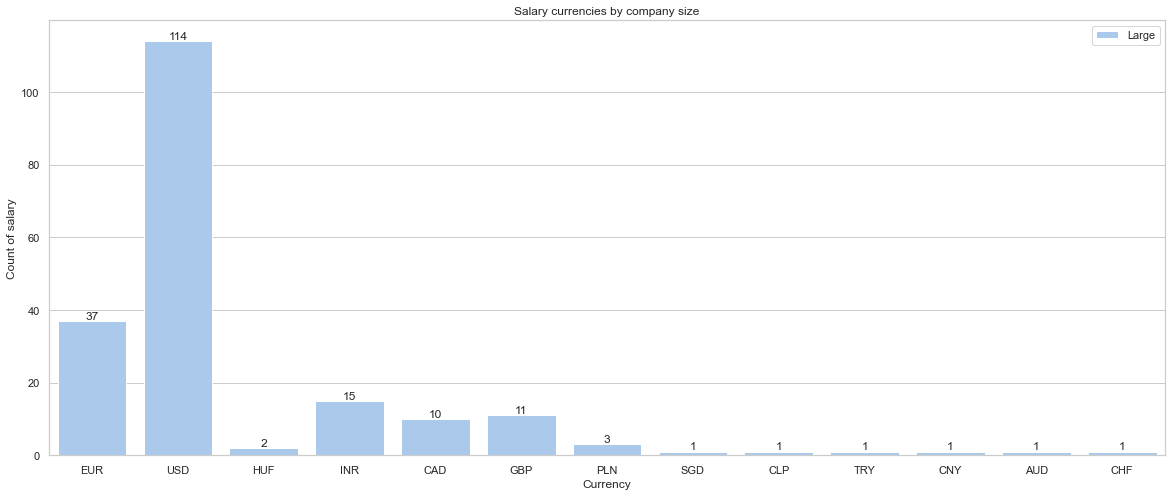

In [241]:
#compare the salary currencies with the company size

large_filter = ds[ds['company_size'] == "Large"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=large_filter, hue='company_size')

plt.title('Salary currencies by company size')
plt.xlabel('Currency')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

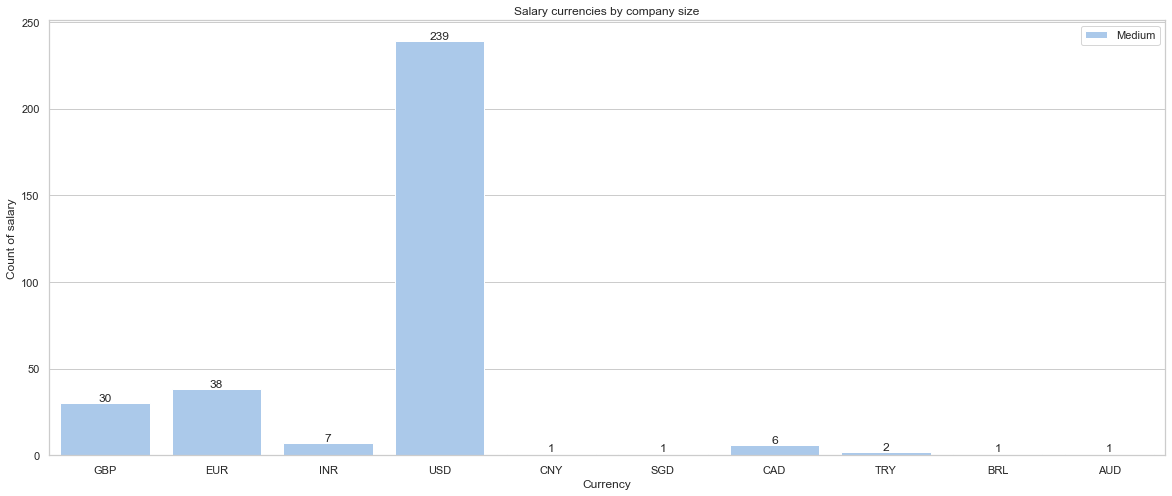

In [242]:
#compare the salary currencies with the company size

medium_filter = ds[ds['company_size'] == "Medium"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=medium_filter, hue='company_size')

plt.title('Salary currencies by company size')
plt.xlabel('Currency')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

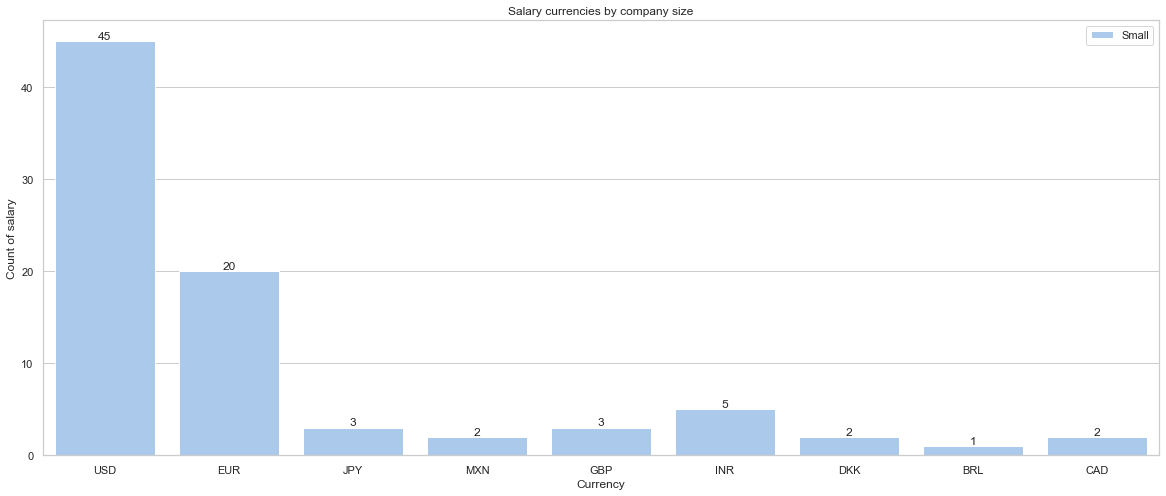

In [243]:
#compare the salary currencies with the company size

small_filter = ds[ds['company_size'] == "Small"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=small_filter, hue='company_size')

plt.title('Salary currencies by company size')
plt.xlabel('Currency')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

#### Salary & Job Title

In [252]:
# Show an overview of the comparism between experience level and salary

Job_pivot = ds.pivot_table(index=['job_title', 'grouped_salary', 'salary_currency'], values = 'salary_in_usd', aggfunc = 'count')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

print(Job_pivot)

                                                           salary_in_usd
job_title                  grouped_salary salary_currency               
AI Engineer                A              USD                          2
                           B              EUR                          1
                                          USD                          2
                           C              BRL                          1
                                          DKK                          1
                                          USD                          2
AI Scientist               A              USD                          2
                           B              USD                          1
                           C              DKK                          1
                                          INR                          1
                                          USD                          2
Data Analyst               A              USD      

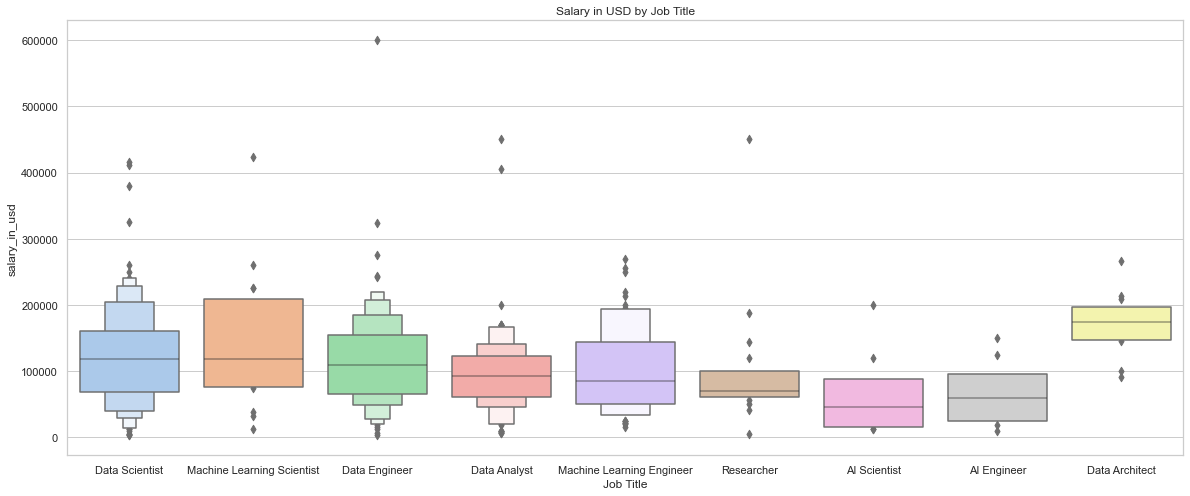

In [254]:
# Visualize a graph which shows the salary offered and the job title

plt.figure(figsize=(20,8))

sns.boxenplot(x='job_title', y='salary_in_usd', data=ds)

plt.title('Salary in USD by Job Title')
plt.xlabel('Job Title')
plt.ylabel('salary_in_usd')

plt.show()

Text(0, 0.5, 'Job Title')

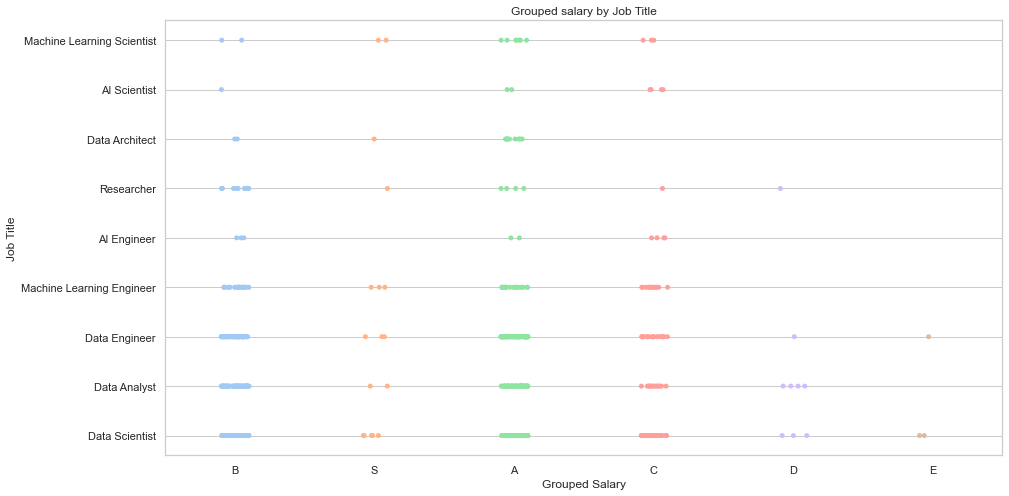

In [255]:

plt.figure(figsize=(15,8))

sns.stripplot(data=ds, x="grouped_salary", y="job_title")


plt.title('Grouped salary by Job Title')
plt.xlabel('Grouped Salary')
plt.ylabel('Job Title')

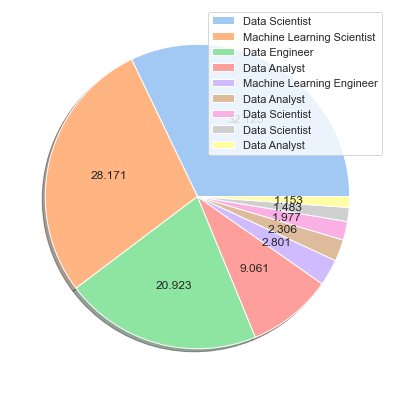

In [263]:
# get the percentage distribution of the salary distribution by job title

ds['salary_currency'].value_counts(normalize=True)

plt.figure(figsize=(20,7))
plt.pie(ds['job_title'].value_counts(normalize=None), autopct='%.3f', shadow=True)
plt.legend(ds['job_title'])

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

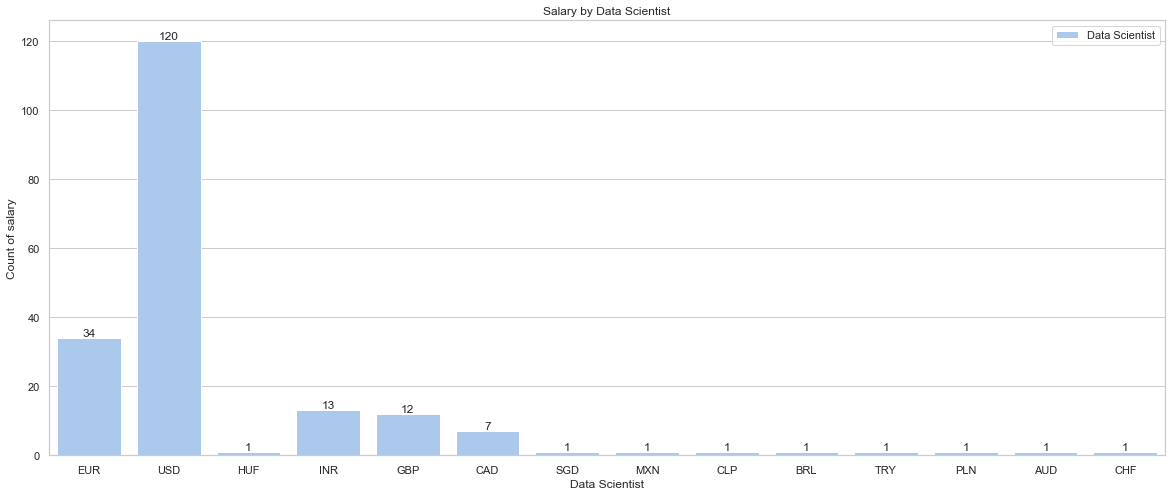

In [267]:
#compare the salary currencies with the job title

job_ds_filter = ds[ds['job_title'] == "Data Scientist"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=job_ds_filter, hue='job_title')

plt.title('Salary by Data Scientist')
plt.xlabel('Data Scientist')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

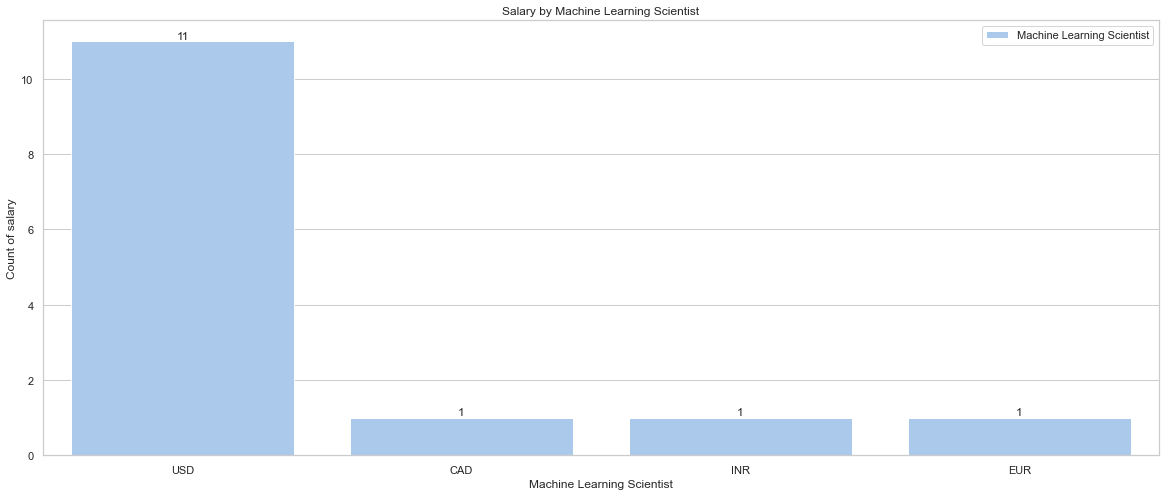

In [268]:
#compare the salary currencies with the job title

job_mls_filter = ds[ds['job_title'] == "Machine Learning Scientist"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=job_mls_filter, hue='job_title')

plt.title('Salary by Machine Learning Scientist')
plt.xlabel('Machine Learning Scientist')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

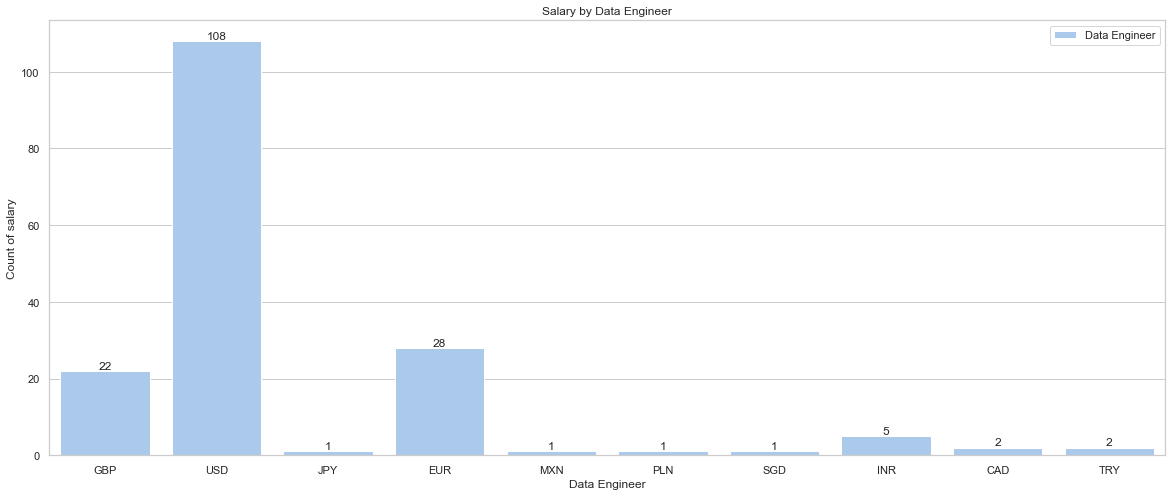

In [269]:
#compare the salary currencies with the job title

job_de_filter = ds[ds['job_title'] == "Data Engineer"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=job_de_filter, hue='job_title')

plt.title('Salary by Data Engineer')
plt.xlabel('Data Engineer')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

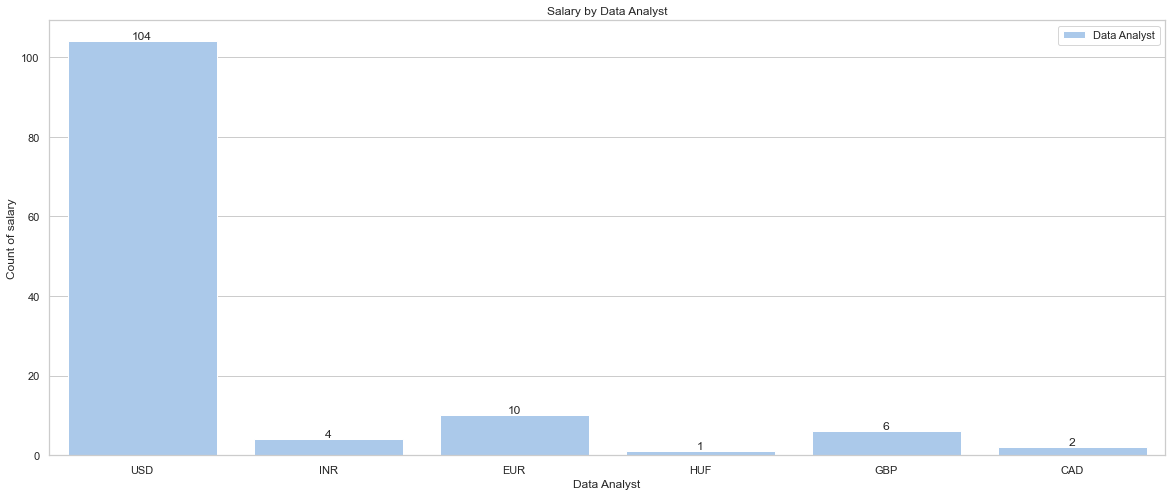

In [272]:
#compare the salary currencies with the job title

job_da_filter = ds[ds['job_title'] == "Data Analyst"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=job_da_filter, hue='job_title')

plt.title('Salary by Data Analyst')
plt.xlabel('Data Analyst')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

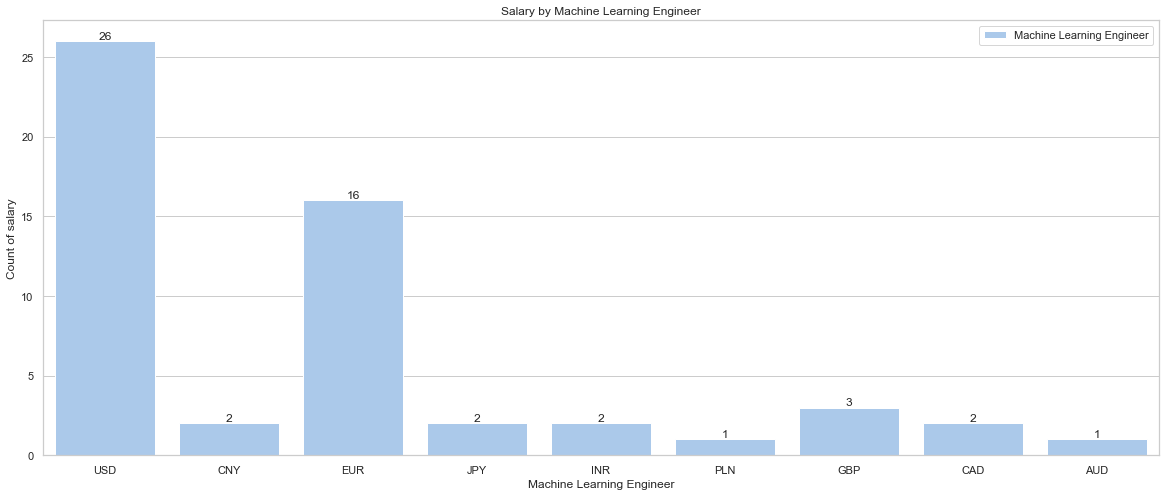

In [274]:
#compare the salary currencies with the job title

job_mle_filter = ds[ds['job_title'] == "Machine Learning Engineer"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=job_mle_filter, hue='job_title')

plt.title('Salary by Machine Learning Engineer')
plt.xlabel('Machine Learning Engineer')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

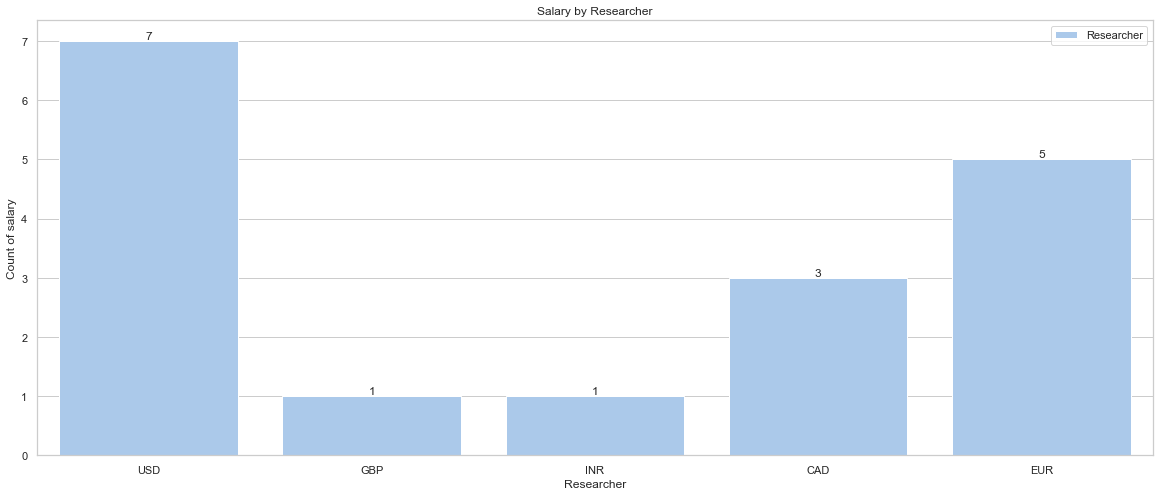

In [276]:
#compare the salary currencies with the job title

job_r_filter = ds[ds['job_title'] == "Researcher"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=job_r_filter, hue='job_title')

plt.title('Salary by Researcher')
plt.xlabel('Researcher')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

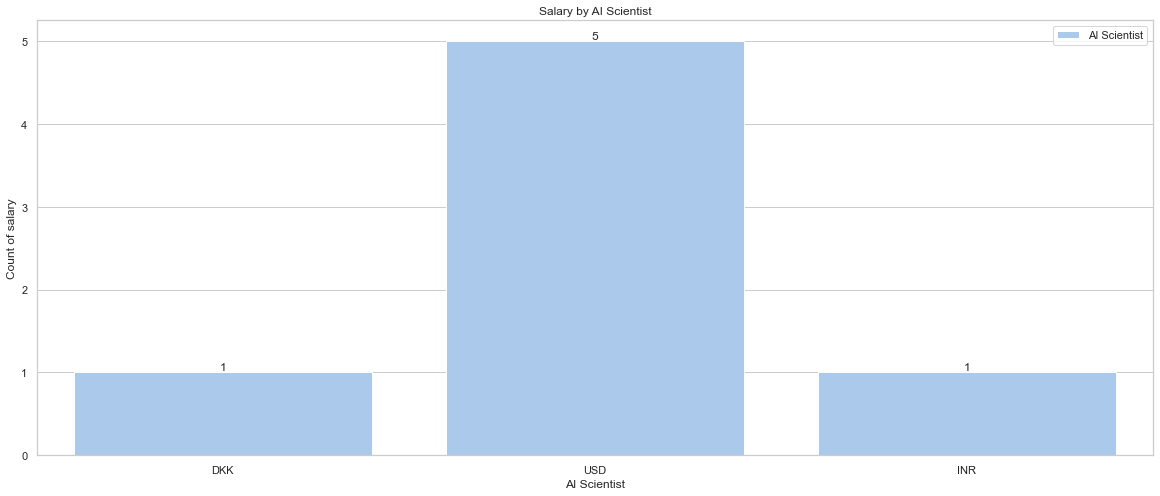

In [278]:
#compare the salary currencies with the job title

job_ais_filter = ds[ds['job_title'] == "AI Scientist"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=job_ais_filter, hue='job_title')

plt.title('Salary by AI Scientist')
plt.xlabel('AI Scientist')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

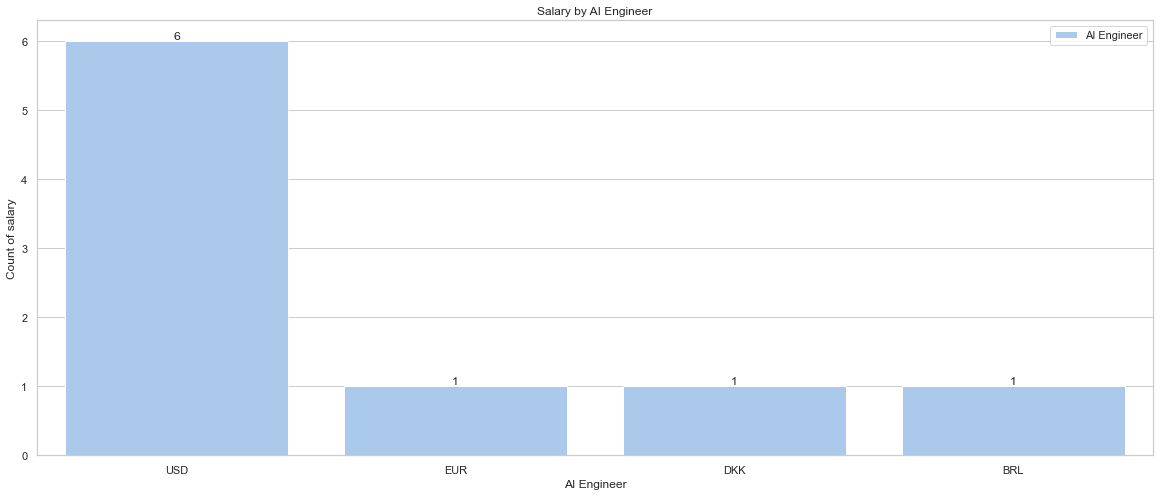

In [279]:
#compare the salary currencies with the job title

job_ais_filter = ds[ds['job_title'] == "AI Engineer"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=job_ais_filter, hue='job_title')

plt.title('Salary by AI Engineer')
plt.xlabel('AI Engineer')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

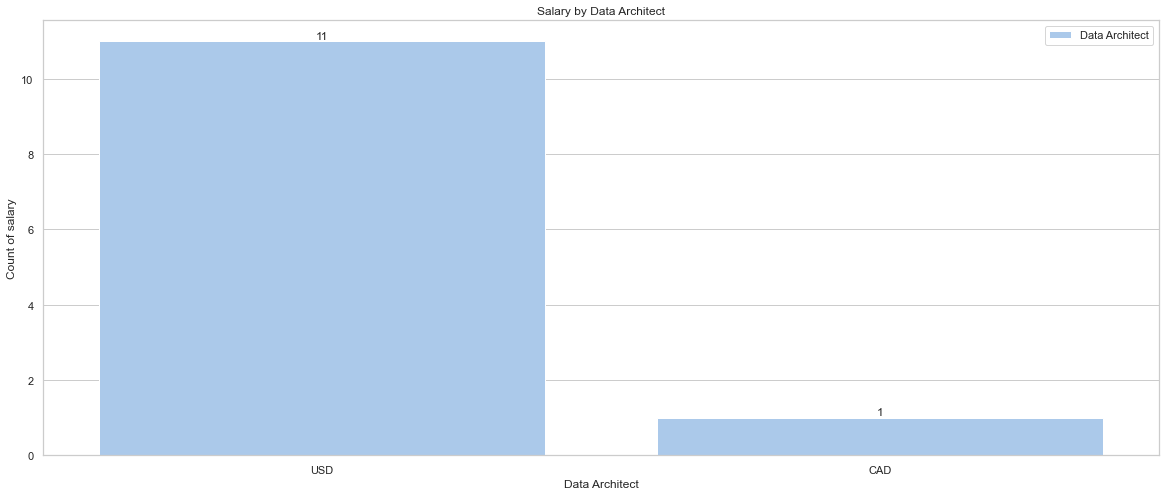

In [280]:
#compare the salary currencies with the job title

job_da_filter = ds[ds['job_title'] == "Data Architect"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=job_da_filter, hue='job_title')

plt.title('Salary by Data Architect')
plt.xlabel('Data Architect')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)


sns.set_theme(style="whitegrid", palette="pastel")

#### Salary & Remote Ratio

In [298]:
# Show an overview of the comparism between experience level and salary

remote_pivot = ds.pivot_table(index=['remote_label', 'grouped_salary', 'salary_currency'], values = 'salary_in_usd', aggfunc = 'count')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

print(remote_pivot)

                                             salary_in_usd
remote_label grouped_salary salary_currency               
Hybrid       A              CAD                          3
                            EUR                          1
                            GBP                          3
                            USD                         16
             B              AUD                          1
                            CAD                          4
                            EUR                         25
                            GBP                          7
                            INR                          3
                            JPY                          2
                            SGD                          1
                            USD                          6
             C              CNY                          1
                            DKK                          2
                            EUR                         

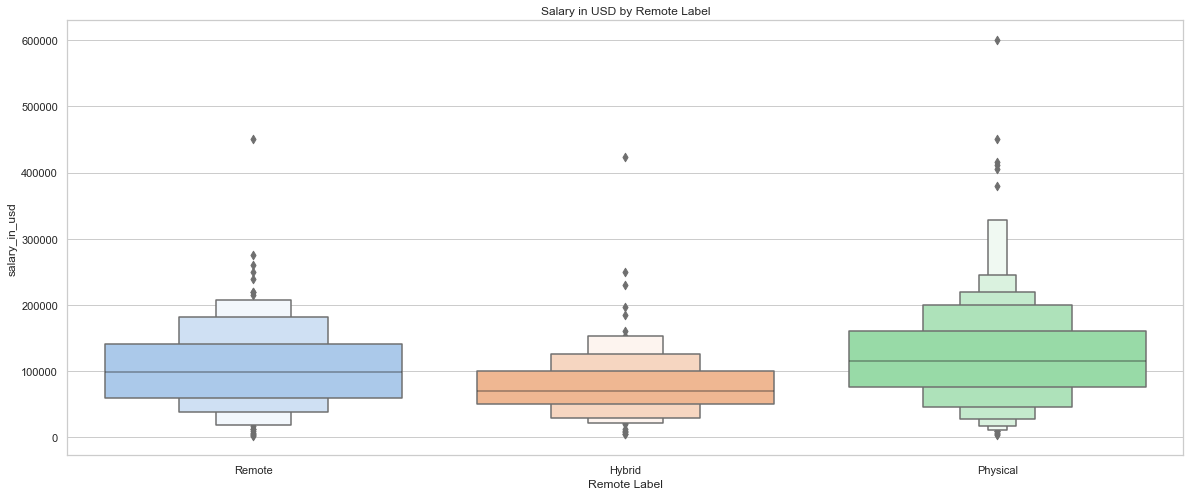

In [305]:
# Visualize a graph which shows the salary offered and the remote label

plt.figure(figsize=(20,8))

sns.boxenplot(x='remote_label', y='salary_in_usd', data=ds)

plt.title('Salary in USD by Remote Label')
plt.xlabel('Remote Label')
plt.ylabel('salary_in_usd')

plt.show()

Text(0, 0.5, 'Remote Label')

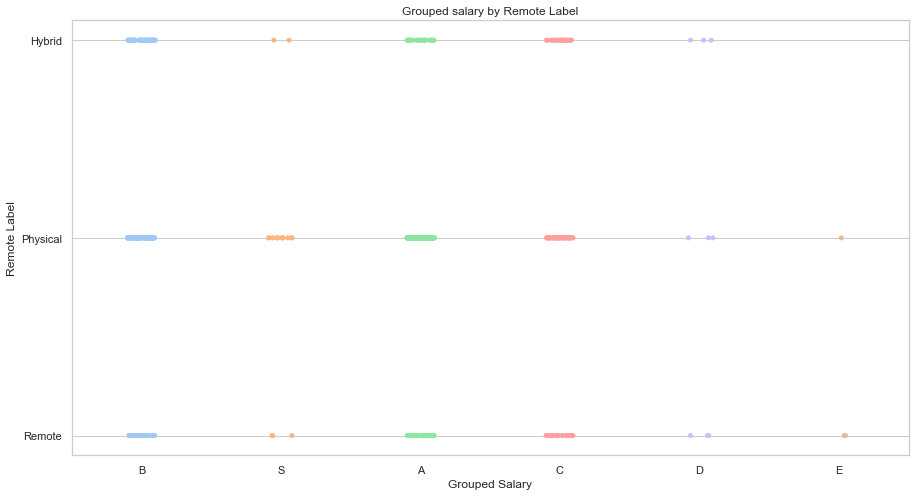

In [306]:

plt.figure(figsize=(15,8))

sns.stripplot(data=ds, x="grouped_salary", y="remote_label")


plt.title('Grouped salary by Remote Label')
plt.xlabel('Grouped Salary')
plt.ylabel('Remote Label')

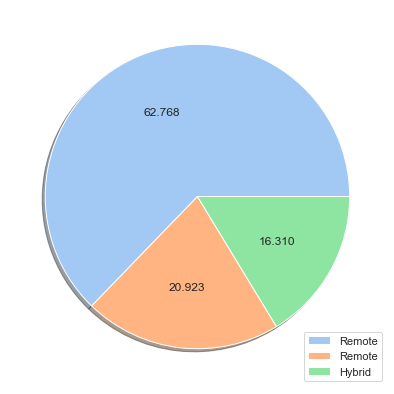

In [312]:
# get the percentage distribution of the salary distribution by job title

ds['salary_currency'].value_counts(normalize=True)

plt.figure(figsize=(20,7))
plt.pie(ds['remote_label'].value_counts(normalize=None), autopct='%.3f', shadow=True)
plt.legend(ds['remote_label'])

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

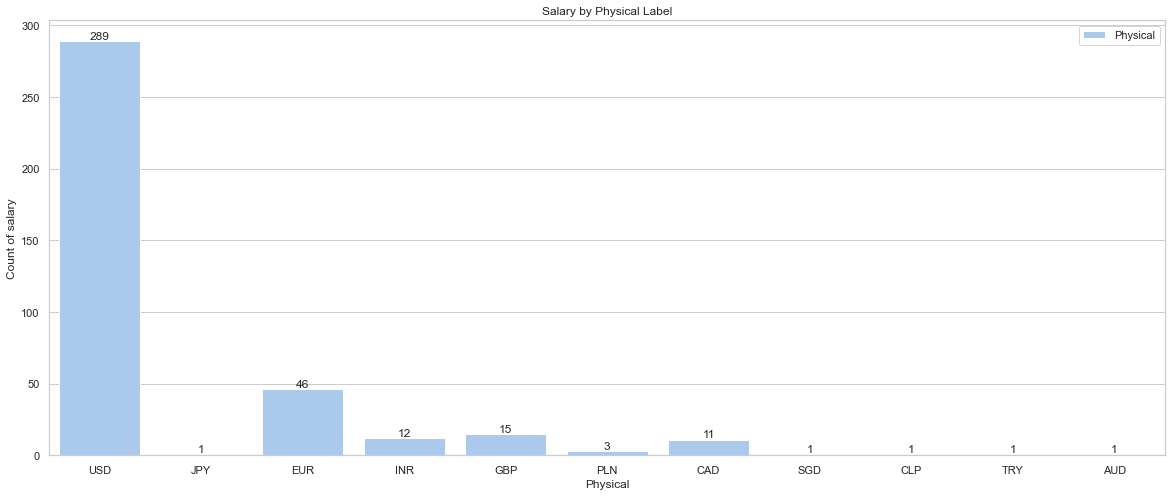

In [324]:
#compare the salary currencies with the job title

premote_filter = ds[ds['remote_label'] == "Physical"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=premote_filter, hue='remote_label')

plt.title('Salary by Physical Label')
plt.xlabel('Physical')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)

sns.set_theme(style="whitegrid", palette="pastel")

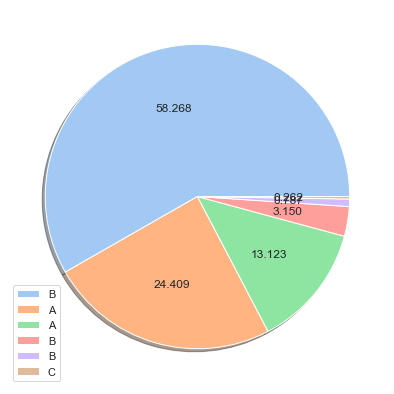

In [327]:
# get the percentage distribution of the salary distribution by job title

premote_filter['salary_currency'].value_counts(normalize=True)

plt.figure(figsize=(20,7))
plt.pie(premote_filter['grouped_salary'].value_counts(normalize=None), autopct='%.3f', shadow=True)
plt.legend(premote_filter['grouped_salary'])

sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

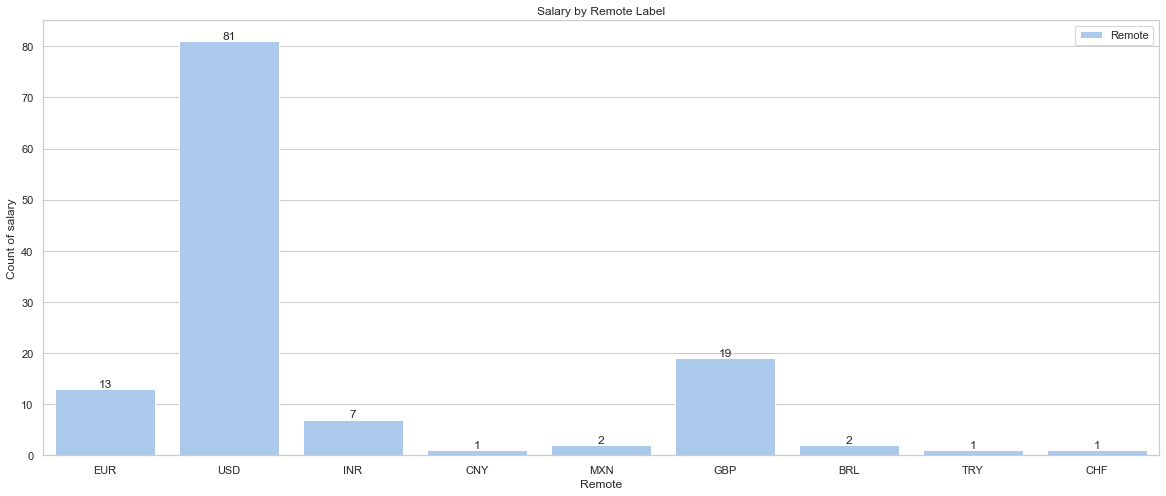

In [323]:
#compare the salary currencies with the job title

rremote_filter = ds[ds['remote_label'] == "Remote"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=rremote_filter, hue='remote_label')

plt.title('Salary by Remote Label')
plt.xlabel('Remote')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)

sns.set_theme(style="whitegrid", palette="pastel")

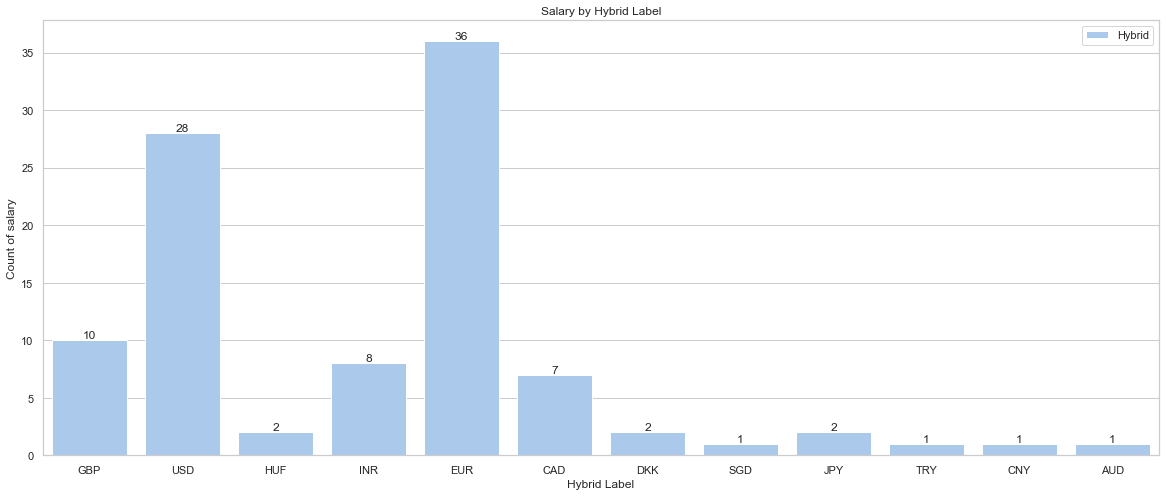

In [321]:
#compare the salary currencies with the job title

hremote_filter = ds[ds['remote_label'] == "Hybrid"]

plt.figure(figsize=(20,8))

ax = sns.countplot(x='salary_currency', data=remote_filter, hue='remote_label')

plt.title('Salary by Hybrid Label')
plt.xlabel('Hybrid Label')
plt.ylabel('Count of salary')
plt.legend(bbox_to_anchor=(1, 1))

for i in ax.containers:
    ax.bar_label(i,)

sns.set_theme(style="whitegrid", palette="pastel")

#### 5.5 : Average salary by company location

In [32]:
# Show an overview of the comparism between average salary and company location

location_pivot = ds.pivot_table(index=['company_continent', 'company_location'], values = 'salary_in_usd', aggfunc = 'mean')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

print(location_pivot)

                                    salary_in_usd
company_continent company_location               
Africa            DZ                100000.000000
                  KE                  9272.000000
                  NG                 30000.000000
Asia              AE                100000.000000
                  CN                 71665.500000
                  IL                119059.000000
                  IN                 28581.750000
                  IQ                100000.000000
                  IR                  4000.000000
                  JP                114127.333333
                  MY                 40000.000000
                  PK                 13333.333333
                  SG                 89294.000000
                  TR                 20096.666667
                  VN                  4000.000000
Europe            AT                 72920.750000
                  BE                 85699.000000
                  CH                 64114.000000


From the above we can deduce the following about each continents: 
            
            1) From Africa: the highest average paid is USD 100,000 and the lowest is USD 9,272
            2) From Asia: the highest average is USD 119,059 and the lowest is USD 4,000
            3) From Europe: the highest average is USD 157,500 while the lowest is USD 13,400
            4) From North America: the highest average is USD 144,055 and the lowest is USD 20,000
            5) From Oceania: the highest average is USD 125,000 and the lowest is USD 18,053
            6) From South America: the highest average is USD 40,038 and the lowest is USD 18,602

In [53]:
#group the data by company_location and company_continent
grouped_location = ds.groupby(['company_location', 'company_continent'])

#calculate the average salary_in_usd for each group
as_usd = grouped_location['salary_in_usd'].mean()

#reset the index of the resulting series to make the company_location and company_continent columns
as_usd = as_usd.reset_index()

as_usd.round(0).head()

,company_location,company_continent,salary_in_usd
0,AE,Asia,100000.0
1,AS,Oceania,18053.0
2,AT,Europe,72921.0
3,AU,Oceania,108043.0
4,BE,Europe,85699.0


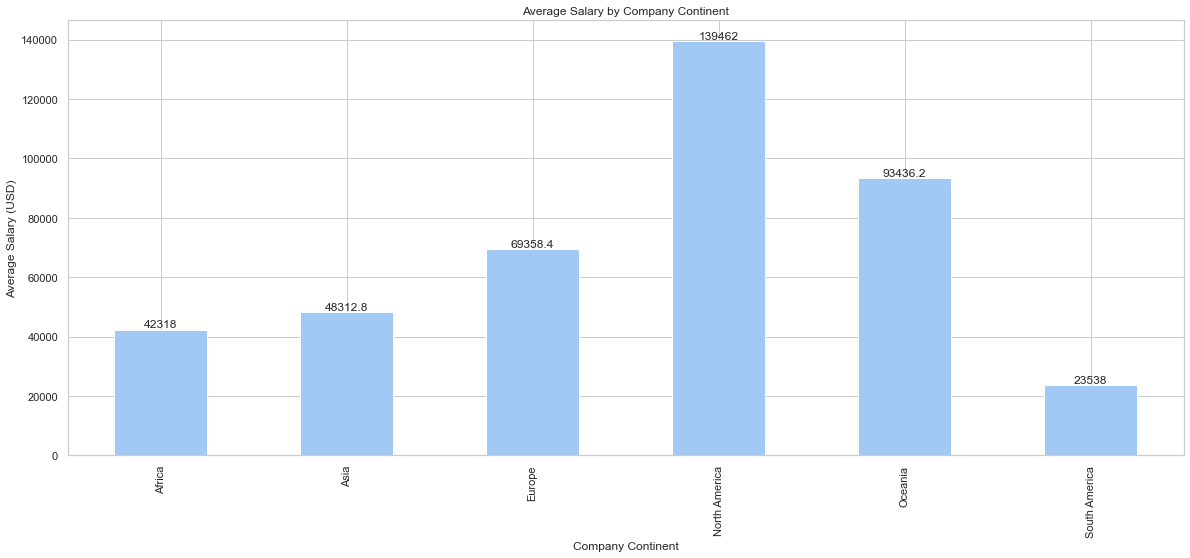

In [63]:
# Plot a graph to compare continents with the highest average

plt.figure(figsize=(20,8))

avg_salary = ds.groupby('company_continent')['salary_in_usd'].mean()
ax = plt.gca()

avg_salary.plot(kind='bar')
plt.xlabel('Company Continent')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Continent')

for i in ax.containers:
    ax.bar_label(i,)
    
sns.set_theme(style="whitegrid", palette="pastel")

plt.show()


From the above, the following can be deduced:
            
     1) North America has the highest average salary paid while south america are the least paid.
     2) Africa and Asia have the similar averages both continents are still far from Europe, Oceania and North America. 
     3) North America is has a huge average salary gap than other countinents there fore the pay is better in North America.
     4) Even with the population Oceania companies pay data professionals fairly better than its coninent conterparts.
     5) For data professionals residing in Africa, Asia, and South America there is a high chance their pay is less than 50,000 USD

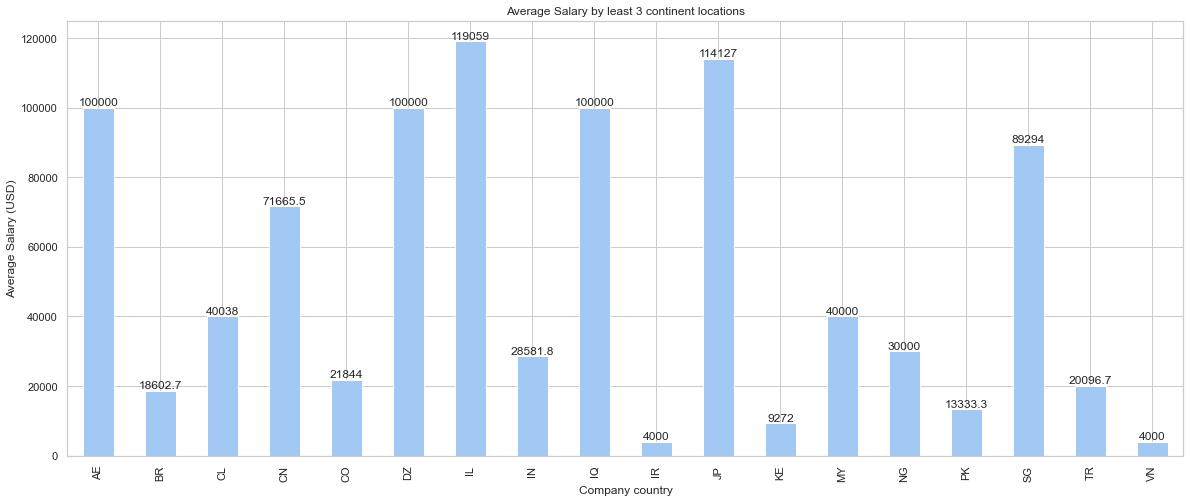

In [87]:
#compare the least 3 countries by averages

plt.figure(figsize=(20,8))

location_filter = ds[(ds['company_continent'] == 'Africa') | (ds['company_continent'] == 'Asia') | (ds['company_continent'] == 'South America')]

avg_salary = location_filter.groupby('company_location')['salary_in_usd'].mean()

ax = plt.gca()

avg_salary.plot(kind='bar')
plt.xlabel('Company country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by least 3 continent locations')

for i in ax.containers:
    ax.bar_label(i,)
    
sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

The following can be deduced from the above about Africa, Asia and South American countries:

        1) The countries IL and JP pay their data professionals very well.
        2) The countries AE, CN, DZ, IQ, and SG pay their data professionals fairly well.
        3) The countries BR, CL, Co, IN, MY, NG, PK and TR  pay their data professionals well.
        4) The countries IR KE and VN pay their data professionals poorly with less than 10,000 being the average

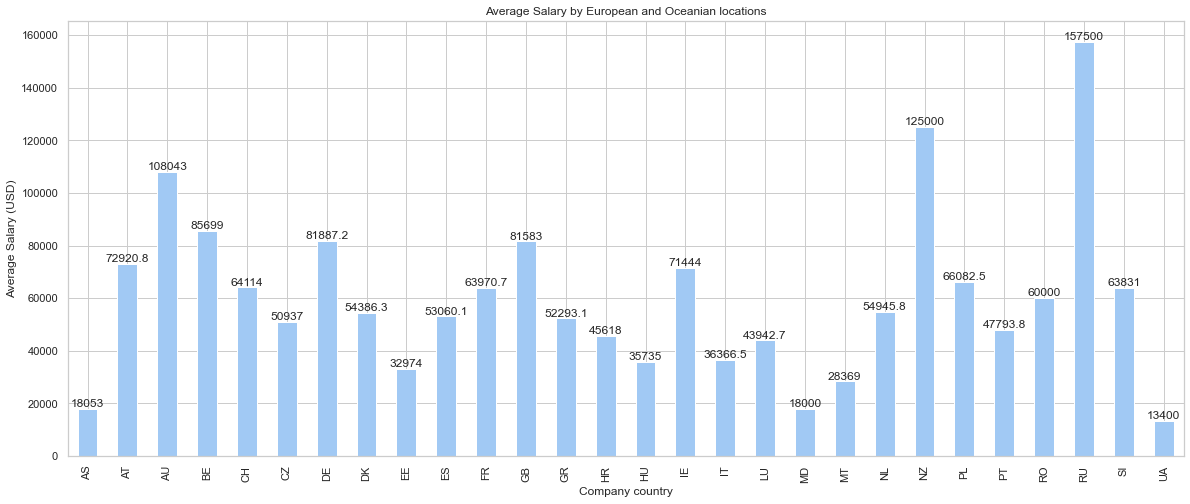

In [85]:
#compare the average salaries offered by Europe and Oceania countries

plt.figure(figsize=(20,8))

location_filter1 = ds[(ds['company_continent'] == 'Europe') | (ds['company_continent'] == 'Oceania') ]

avg_salary = location_filter1.groupby('company_location')['salary_in_usd'].mean()

ax = plt.gca()

avg_salary.plot(kind='bar')
plt.xlabel('Company country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by European and Oceanian locations')

for i in ax.containers:
    ax.bar_label(i,)
    
sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

The following can be deduced from the above about Europe and Oceania countries:

        1) The country IRJ and NZ pays data professionals incredibly well
        2) The country AT, AJ, BE, CH, CZ, DE, DK, ES, FR, GB, GR, IE, NL, PL, RO, and SI pay their data professionals fairly well
        3) The country AS, EE, HR, HU, IT, MD, MT, PT, and UA pay their data professionals well

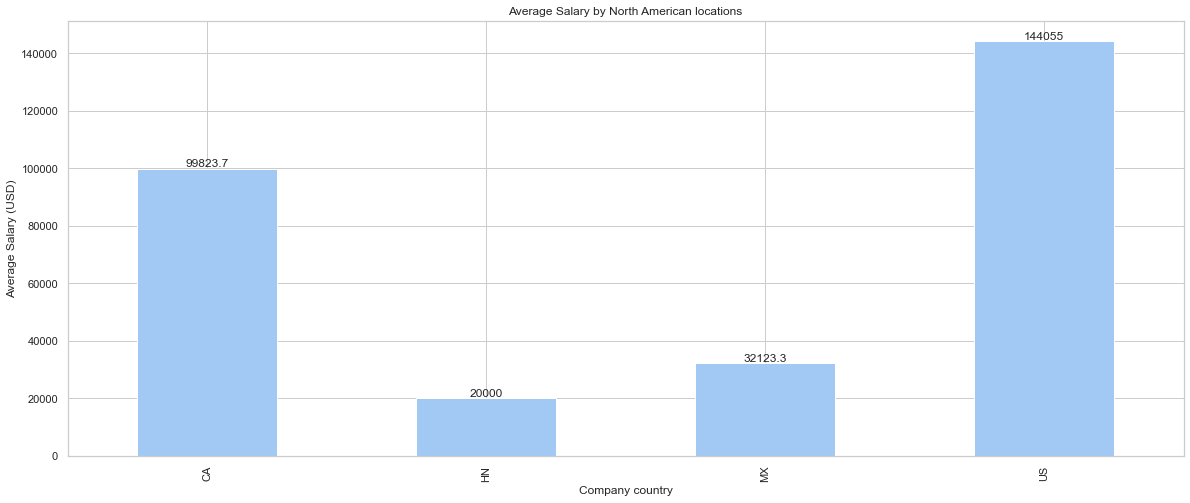

In [88]:
#compare the average salaries offered by North American countries

plt.figure(figsize=(20,8))

location_filter2 = ds[(ds['company_continent'] == 'North America')]

avg_salary = location_filter2.groupby('company_location')['salary_in_usd'].mean()

ax = plt.gca()

avg_salary.plot(kind='bar')
plt.xlabel('Company country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by North American locations')

for i in ax.containers:
    ax.bar_label(i,)
    
sns.set_theme(style="whitegrid", palette="pastel")

plt.show()

The following can be deduced from the above about North American countries:

        1) The US pays their data professionals very well
        2) The CA pays their data professionals fairly well
        3) Both HN and MK pay their professionals well

# Conclusion

This EDA makes use of 600 data professionals as a basis to actualize various conditions pertaining to data scientists worldwide. 

The following criteria were explored, Work Year Analysis, Experience Level Analysis, Company Location Analysis and Salary Analysis. This led to a variety of findings which are summarized below: 
    
   From the general analysis, it was realized that majority of data professionals are at a mid level where the major roles were the Data Scientist, Data Engineer & Data Analyst while less professionals eased in on jobs which had to do with AI enginnering or AI scientists. In terms of employment, it seems employers prefreered to offer roles to full time data professionals and less to free lancers. There were over 50 different countries and the united states had the most populance of both data professionals and the companies requiring data scientists. furthermore, the USD was the most offered currency to data professionals. The pay being offered the most was an 'A' grade which was earnings between 100,000 and 249,999 with majority of the firms requiring data professionals being medium sized and offered more roles to professionals available physically. 
   
   From the work year analysis, it was deduced that as the years progressed, more data professionals were offered roles meanwhile the physical roles had a significant jump in 2022 which means the demand for data professionals saw a sudden rise in 2022, although the hybrid roles remote jobs requested saw a decrease over the years. 
   
   From the experience level analysis, it was actualized that majority of roles were full time roles, meanwhile the most indemand experience level was the senior level while the entry level was required at the same extent across all other company sizes. 
   
   From the company location analysis, it was deduced that Europe, Asia and North America have all the experience levelled data scientists while the experts and senior levels was lacking in Oceania, South America and Africa. The data also shows that majority of data professionals in all experience level reside in North America with the mid level experience being the most popular experience level. 
   
   From salary analysis, it was deduced that the best paid experience level was the senior levelled professionals while the least paid was the mid and entry levels. Even in currency, USD is offered more to seniors while EUR is offered more to mid levelled professionals. Medium sized companies paid the best amongst all the company sizes offering an average over 100,000 USD. In terms of job roles, the data architect was paid the most on average although their numbers are quite minimal while the AI scientist has the lowest average pay. The following roles are usuallly paid very well, the ML scientist, the AI scientist, the data archtitect, the researcher, the AI engineer & the ML engineer. It was also noticed that physical roles are offered more pay than other roles and have a higher average. In terms of location North America pays the best salaries. 